,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Forma entrenamiento (32561, 15)
Forma prueba (16281, 15)

Frecuencia de categorías en 'workclass':
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Frecuencia de categorías en 'education':
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

Frecuencia de categorías en 'marital-status':
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed        

/tmp/ipython-input-2672091844.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_clean['income'] = y_test_clean['income'].str.replace('.', '', regex=False)


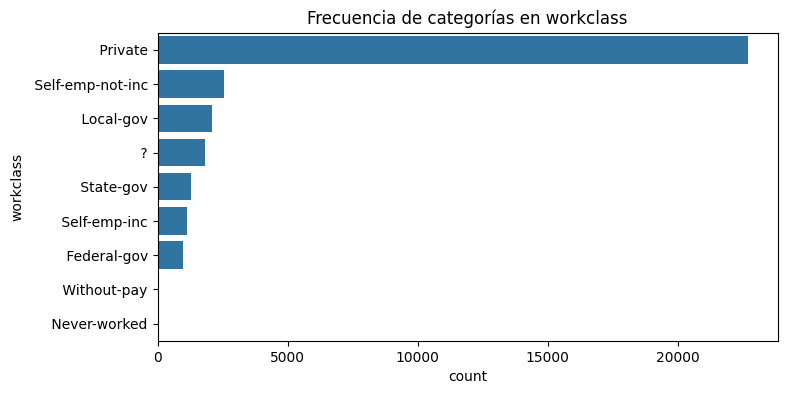

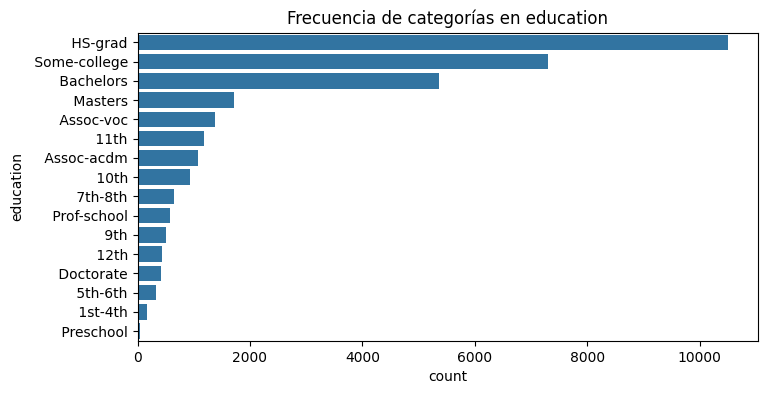

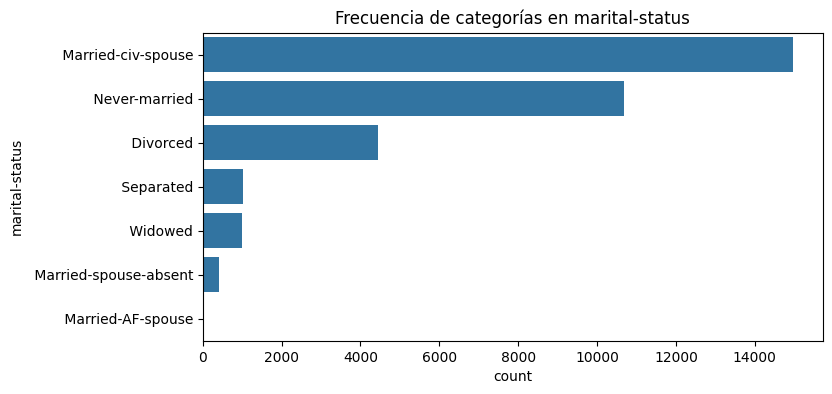

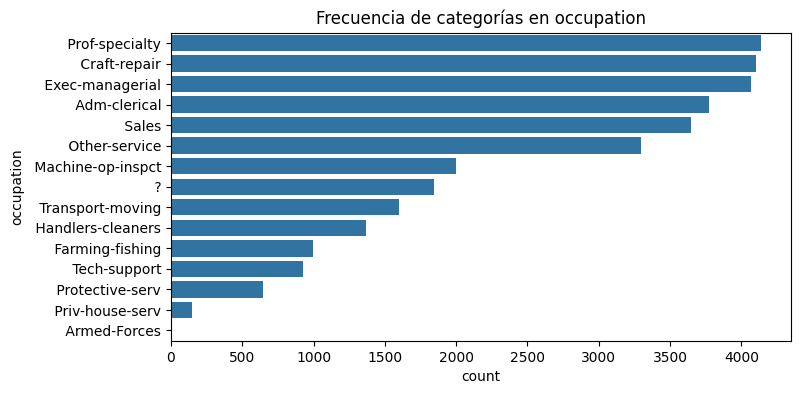

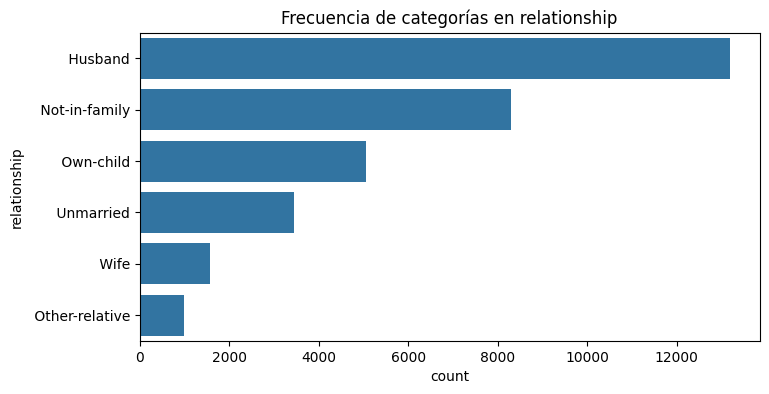

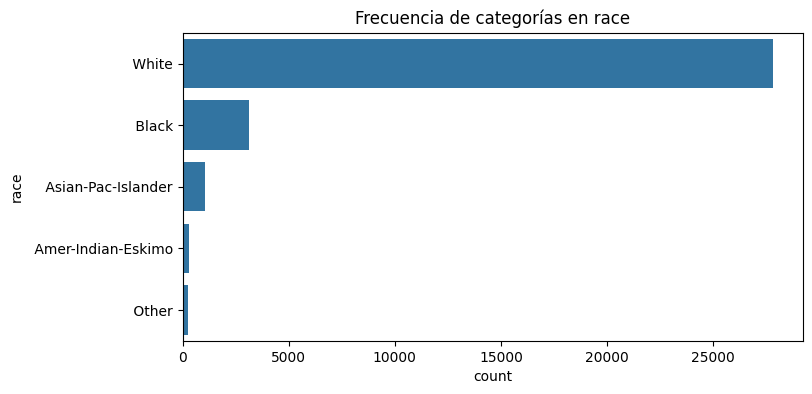

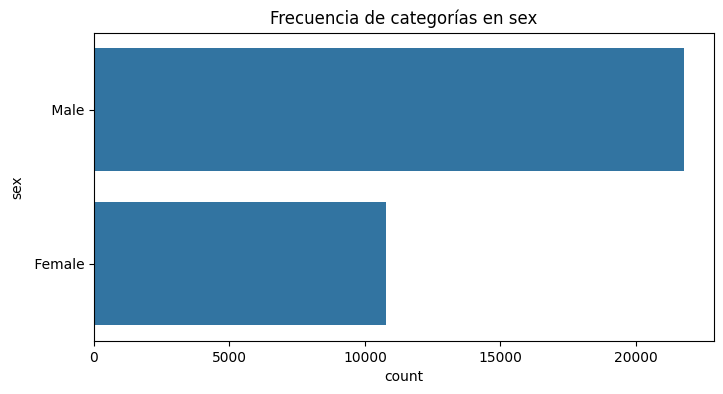

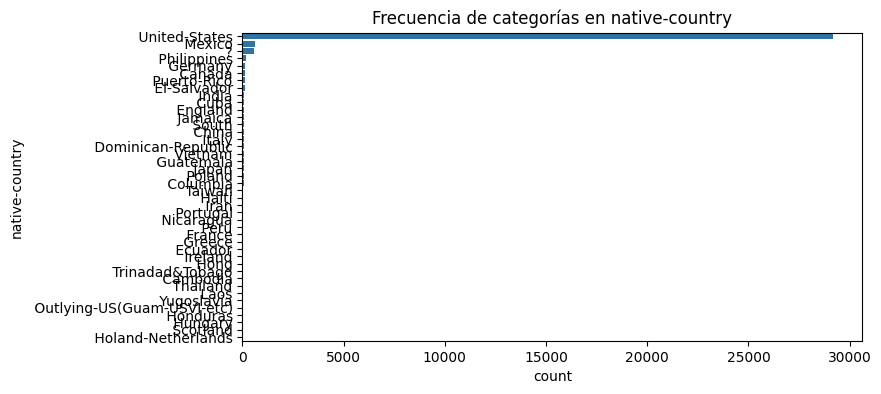

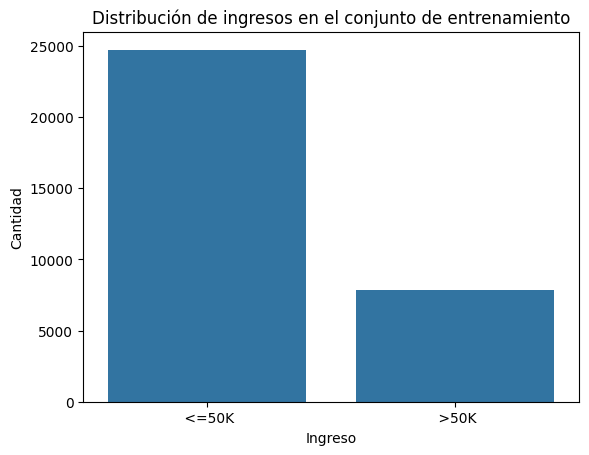


Descriptive Statistics for Numerical Columns:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


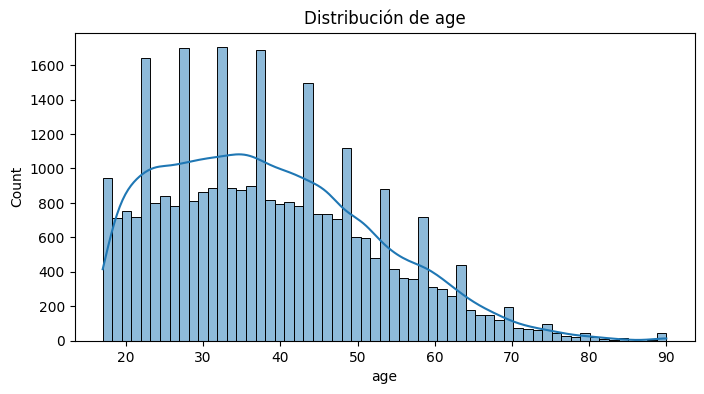

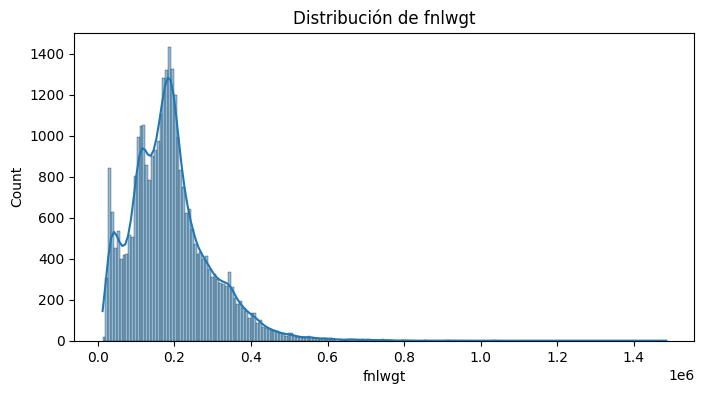

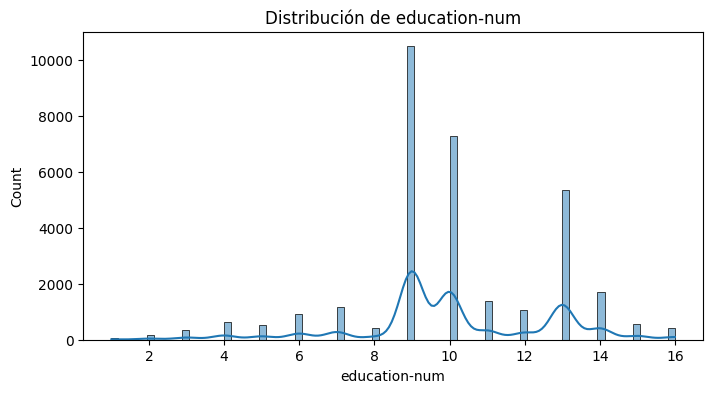

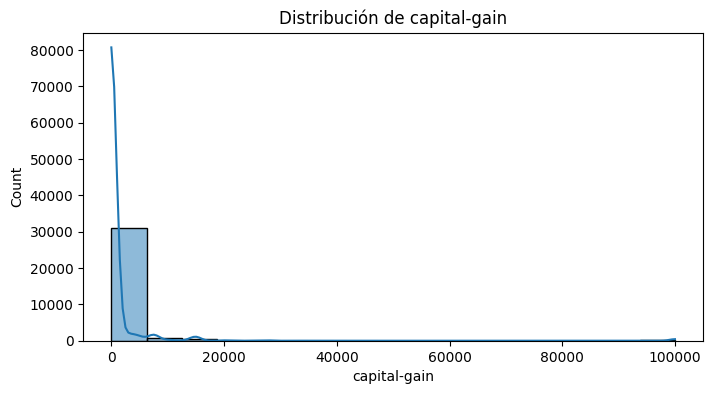

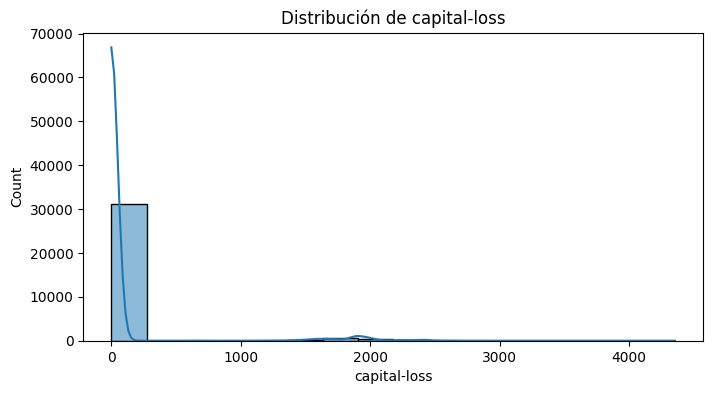

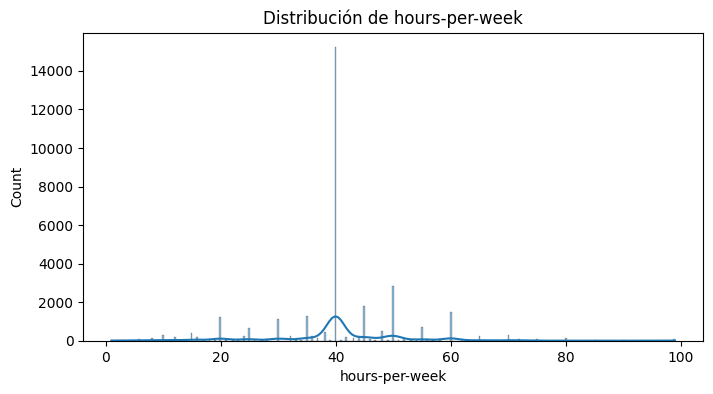


📊 Métricas para Entrenamiento:
Accuracy:  0.8129
Precision: 0.5755
Recall:    0.8494
F1 Score:  0.6861
Confusion Matrix:
[[19808  4912]
 [ 1181  6660]]

📊 Métricas para Validación:
Accuracy:  0.8064
Precision: 0.5587
Recall:    0.8319
F1 Score:  0.6685
Confusion Matrix:
[[4976 1255]
 [ 321 1589]]

📊 Métricas para Prueba:
Accuracy:  0.8114
Precision: 0.5695
Recall:    0.8481
F1 Score:  0.6815
Confusion Matrix:
[[4963 1241]
 [ 294 1642]]


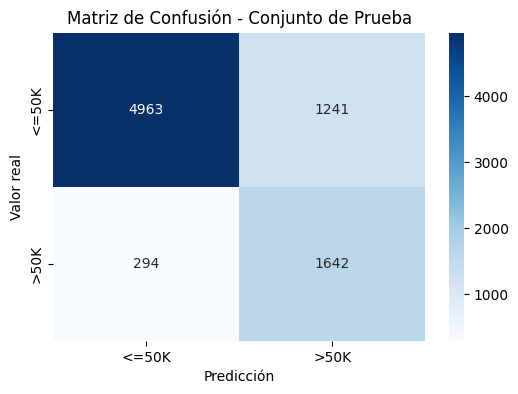

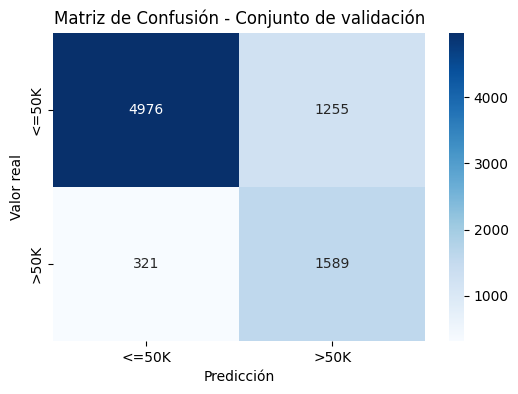

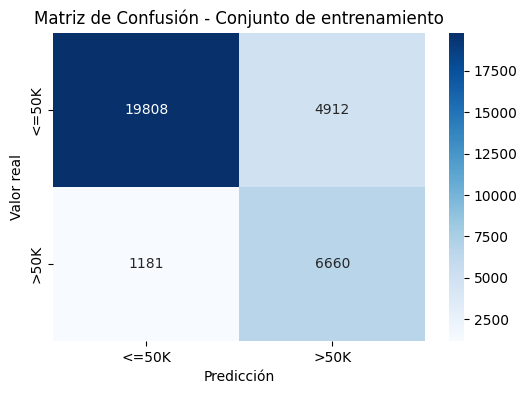

In [22]:
# Se cargan librerias para leer y en caso necesario manipular
# y realizar operaciones

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns


#Se importan los datos

# Se definen los nombres de las columnas para evitar errores
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


#Se define df como las observaciones de entrenamiento
df = pd.read_csv("/content/adult.data", names=column_names)

#Se define df_test las observaciones de prueba, y se quita la primera fila dado que esta llena de comentarios
df_test = pd.read_csv("/content/adult.test", names=column_names, skiprows=1)


#Se observa el conjunto de datos
display(df.head(10))
display(df.columns)

#Se ajusta para eliminar missing values dado que en la pagina de la información se informa que existen

df_clean = df.dropna()
df_clean_test = df_test.dropna()

#Se confirma estructura de los datos
print("Forma entrenamiento", df_clean.shape)
print("Forma prueba", df_clean_test.shape)

#Al comparar antes y despues, no se elimina ningun valor, por lo tanto solo queda una opción. Dado que al mirar los datos
#lo que existe son valores "?". Ahora bien, estos no se eliminan por la justificacón que se presenta en el ReadMe
#Por lo tanto se deja la base de datos igual y se procede a hacer las matrices


# Se caracterizan con base al nuevo data frame las variables que predicen y el
#objetivo
target = "income"
x_train_clean = df_clean.drop(target, axis=1)
y_train_clean = df_clean[[target]]
x_test_clean = df_clean_test.drop(target, axis=1)
y_test_clean = df_clean_test[[target]]

# Se arregla la variable de prueba para evitar errores
y_test_clean['income'] = y_test_clean['income'].str.replace('.', '', regex=False)

#Se hace el split
x_test_clean, x_val_clean, y_test_clean, y_val_clean = train_test_split(x_test_clean, y_test_clean, test_size=0.5, random_state=42)

#Se hace el EDA

################Información Categoricas y Númericas EDA#########################

#Categoricas

categorical_cols = df_clean.select_dtypes(include='object').columns.drop('income')

for col in categorical_cols:
    print(f"\nFrecuencia de categorías en '{col}':")
    print(df_clean[col].value_counts())

#En graficos

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df_clean, order=df_clean[col].value_counts().index)
    plt.title(f'Frecuencia de categorías en {col}')
    plt.show()


#Información variable objetivo
sns.countplot(x='income', data=df_clean)
plt.title('Distribución de ingresos en el conjunto de entrenamiento')
plt.xlabel('Ingreso')
plt.ylabel('Cantidad')
plt.show()

#Información variables númericas

numerical_cols = x_train_clean.select_dtypes(include=np.number).columns

print("\nDescriptive Statistics for Numerical Columns:")
display(x_train_clean[numerical_cols].describe().loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])


for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(x=col, data=x_train_clean, kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# Se realizan ajustes para lograr usar las variables más adelante

# Se identifican las variables categoricaas y numericas para poder hacer los ajustes
categorical_cols_clean = x_train_clean.select_dtypes(include='object').columns
numerical_cols_clean = x_train_clean.select_dtypes(include=np.number).columns

# Se aplica One Hot Encoder a las categoricas para poder usarlas
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
x_train_categorical_encoded = onehot_encoder.fit_transform(x_train_clean[categorical_cols_clean])
x_test_categorical_encoded = onehot_encoder.transform(x_test_clean[categorical_cols_clean])
x_val_categorical_encoded = onehot_encoder.transform(x_val_clean[categorical_cols_clean])

# Se normalizan las variables numericas para evitar explosión del gradiente y
# se garantiza que el modelo no vea información del futuro
feature_scaler = StandardScaler()
x_train_numerical_scaled = feature_scaler.fit_transform(x_train_clean[numerical_cols_clean])
x_test_numerical_scaled = feature_scaler.transform(x_test_clean[numerical_cols_clean])
x_val_numerical_scaled = feature_scaler.transform(x_val_clean[numerical_cols_clean])


# Se concatenan las variables numericas ajustadas con las categoricas
x_train_processed = np.concatenate([x_train_numerical_scaled, x_train_categorical_encoded.toarray()], axis=1)
x_test_processed = np.concatenate([x_test_numerical_scaled, x_test_categorical_encoded.toarray()], axis=1)
x_val_processed = np.concatenate([x_val_numerical_scaled, x_val_categorical_encoded.toarray()], axis=1)


# Se trasnforma la variable binaria en 0 para <=50K y 1 para >50K

#y_train_encoded = np.where(y_train_clean.values == ' <=50K', 0, 1)
#y_test_encoded = np.where(y_test_clean.values == ' <=50K', 0, 1)
#y_val_encoded = np.where(y_val_clean.values == ' <=50K', 0, 1)

#y_train_encoded = df_clean["income"].map({"<=50K": 0, ">50K": 1})
#y_test_encoded = df_clean_test["income"].map({"<=50K": 0, ">50K": 1})
#y_val_encoded = df_clean_test["income"].map({"<=50K": 0, ">50K": 1})

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_clean.values.ravel())
y_test_encoded = label_encoder.transform(y_test_clean.values.ravel())
y_val_encoded = label_encoder.transform(y_val_clean.values.ravel())


#Se corre el modelo de regresión logística que se sabe es el mejor dado que el modelo se encarga de buscar el optimo

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42, class_weight='balanced', max_iter=1000)
model.fit(x_train_processed, y_train_encoded)

y_train_pred = model.predict(x_train_processed)
y_val_pred = model.predict(x_val_processed)
y_test_pred = model.predict(x_test_processed)

def evaluate_model(y_true, y_pred, group_name):
    print(f"\n📊 Métricas para {group_name}:")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))


evaluate_model(y_train_encoded, y_train_pred, "Entrenamiento")
evaluate_model(y_val_encoded,   y_val_pred,   "Validación")
evaluate_model(y_test_encoded,  y_test_pred,  "Prueba")


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_encoded, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.show()


cm = confusion_matrix(y_val_encoded, y_val_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Conjunto de validación')
plt.show()


cm = confusion_matrix(y_train_encoded, y_train_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Conjunto de entrenamiento')
plt.show()


Starting evaluation for combination 1/5...
Using device: cpu
Epoch 1: train_loss=0.3348, val_loss=0.3123
Epoch 2: train_loss=0.3064, val_loss=0.3117
Epoch 3: train_loss=0.3026, val_loss=0.3110
Epoch 4: train_loss=0.2990, val_loss=0.3138
Epoch 5: train_loss=0.2959, val_loss=0.3105
Epoch 6: train_loss=0.2922, val_loss=0.3125
Epoch 7: train_loss=0.2895, val_loss=0.3133
Epoch 8: train_loss=0.2852, val_loss=0.3158
Epoch 9: train_loss=0.2815, val_loss=0.3147
Epoch 10: train_loss=0.2788, val_loss=0.3177
Epoch 11: train_loss=0.2743, val_loss=0.3197
Epoch 12: train_loss=0.2707, val_loss=0.3245
Epoch 13: train_loss=0.2729, val_loss=0.3352
Epoch 14: train_loss=0.2690, val_loss=0.3363
Epoch 15: train_loss=0.2654, val_loss=0.3482
Epoch 16: train_loss=0.2622, val_loss=0.3396
Epoch 17: train_loss=0.2590, val_loss=0.3421
Epoch 18: train_loss=0.2551, val_loss=0.3496
Epoch 19: train_loss=0.2520, val_loss=0.3550
Epoch 20: train_loss=0.2482, val_loss=0.3589
Epoch 21: train_loss=0.2442, val_loss=0.3744
Epo

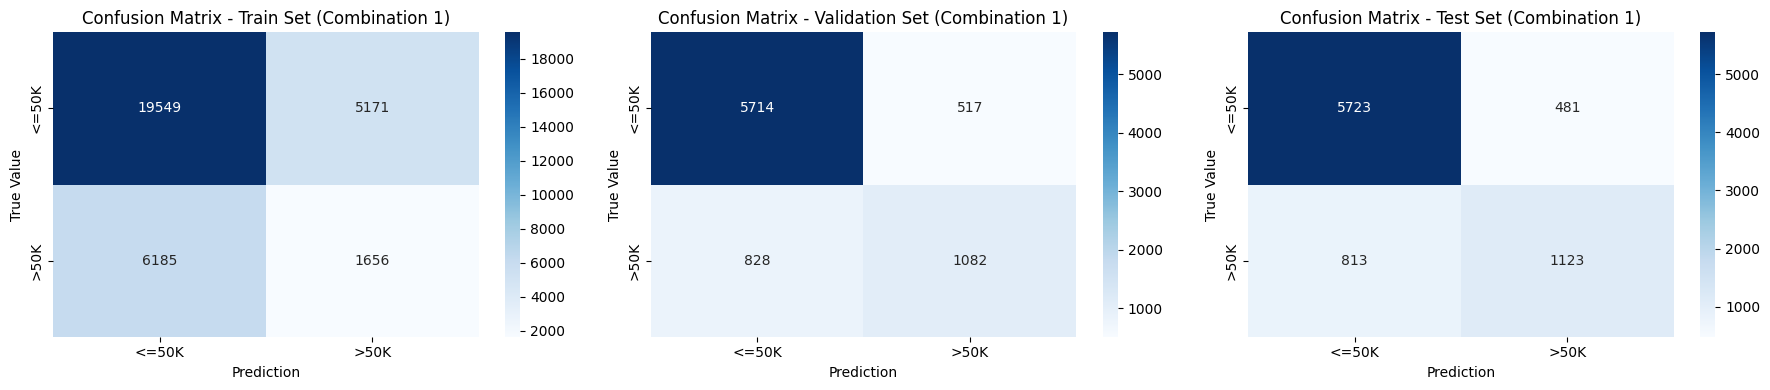

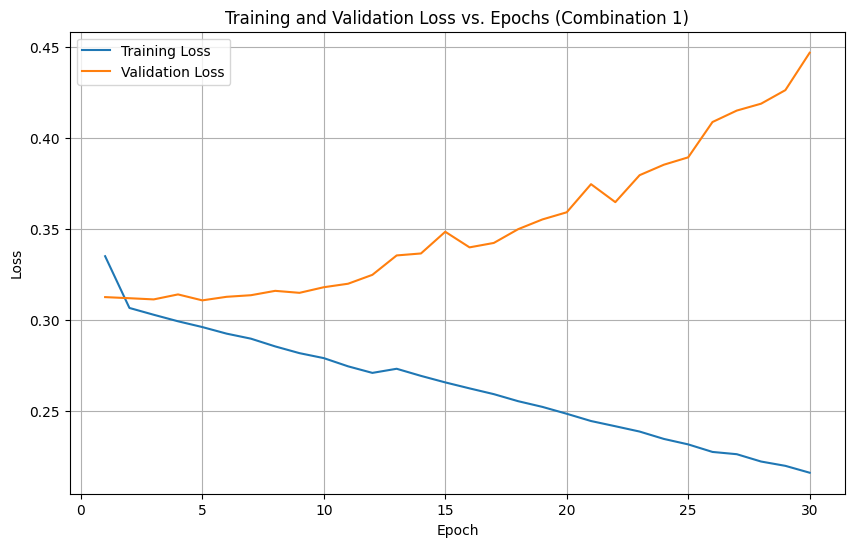

Completed evaluation for combination 1/5.
Starting evaluation for combination 2/5...
Using device: cpu
Epoch 1: train_loss=0.3493, val_loss=0.3138
Epoch 2: train_loss=0.3076, val_loss=0.3110
Epoch 3: train_loss=0.3023, val_loss=0.3111
Epoch 4: train_loss=0.2977, val_loss=0.3112
Epoch 5: train_loss=0.2944, val_loss=0.3129
Epoch 6: train_loss=0.2913, val_loss=0.3118
Epoch 7: train_loss=0.2877, val_loss=0.3102
Epoch 8: train_loss=0.2829, val_loss=0.3136
Epoch 9: train_loss=0.2791, val_loss=0.3144
Epoch 10: train_loss=0.2750, val_loss=0.3134
Epoch 11: train_loss=0.2707, val_loss=0.3188
Epoch 12: train_loss=0.2662, val_loss=0.3288
Epoch 13: train_loss=0.2608, val_loss=0.3373
Epoch 14: train_loss=0.2556, val_loss=0.3393
Epoch 15: train_loss=0.2527, val_loss=0.3403
Epoch 16: train_loss=0.2452, val_loss=0.3555
Epoch 17: train_loss=0.2396, val_loss=0.3637
Epoch 18: train_loss=0.2345, val_loss=0.3522
Epoch 19: train_loss=0.2296, val_loss=0.3858
Epoch 20: train_loss=0.2255, val_loss=0.3902
Epoch 

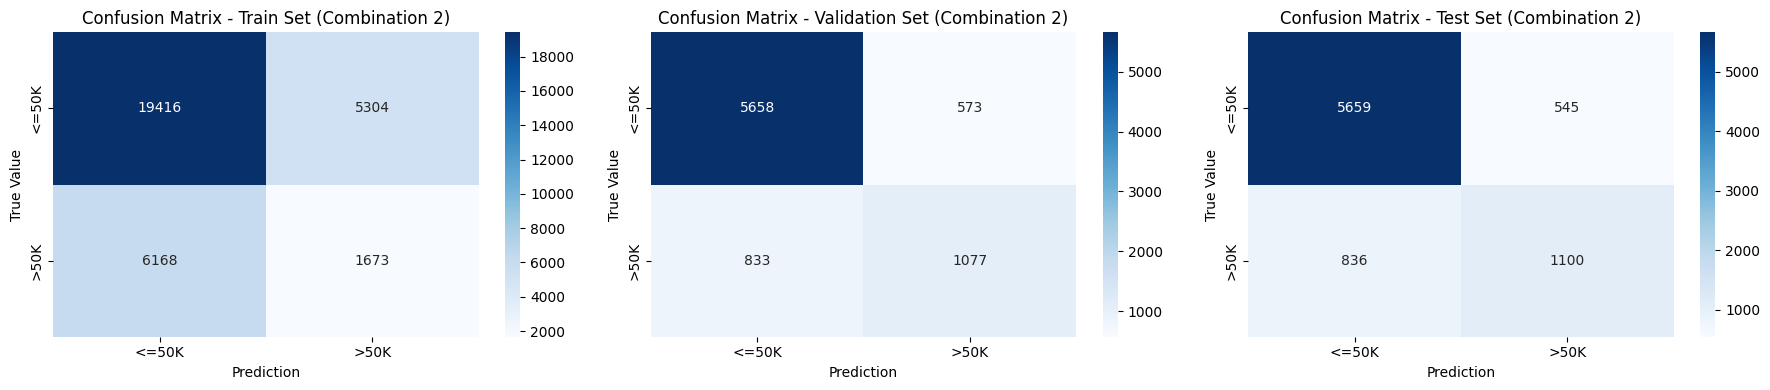

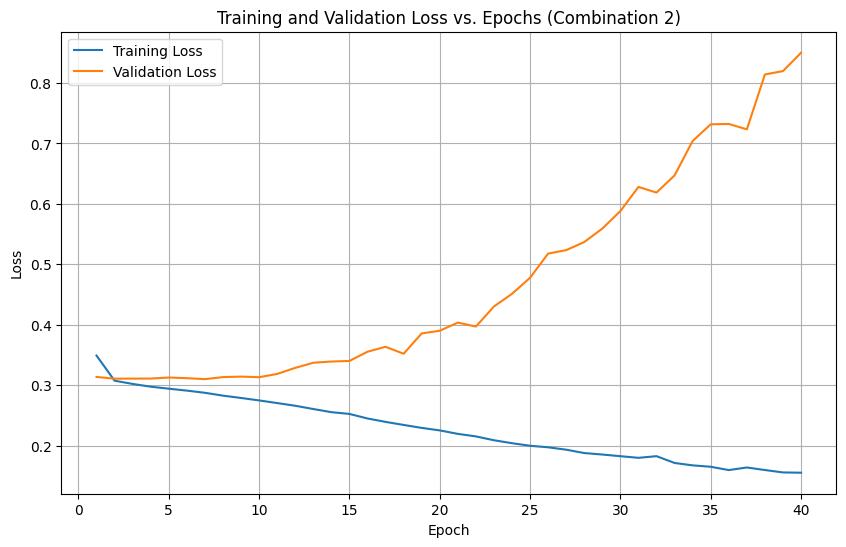

Completed evaluation for combination 2/5.
Starting evaluation for combination 3/5...
Using device: cpu
Epoch 1: train_loss=0.3321, val_loss=0.3207
Epoch 2: train_loss=0.3084, val_loss=0.3133
Epoch 3: train_loss=0.3015, val_loss=0.3108
Epoch 4: train_loss=0.2975, val_loss=0.3154
Epoch 5: train_loss=0.2924, val_loss=0.3123
Epoch 6: train_loss=0.2854, val_loss=0.3201
Epoch 7: train_loss=0.2791, val_loss=0.3190
Epoch 8: train_loss=0.2751, val_loss=0.3270
Epoch 9: train_loss=0.2678, val_loss=0.3374
Epoch 10: train_loss=0.2600, val_loss=0.3420
Epoch 11: train_loss=0.2554, val_loss=0.3375
Epoch 12: train_loss=0.2490, val_loss=0.3730
Epoch 13: train_loss=0.2517, val_loss=0.3952
Epoch 14: train_loss=0.2591, val_loss=0.4035
Epoch 15: train_loss=0.2328, val_loss=0.4095
Epoch 16: train_loss=0.2240, val_loss=0.4101
Epoch 17: train_loss=0.2195, val_loss=0.4794
Epoch 18: train_loss=0.2139, val_loss=0.5337
Epoch 19: train_loss=0.2105, val_loss=0.5158
Epoch 20: train_loss=0.2010, val_loss=0.5366
Epoch 

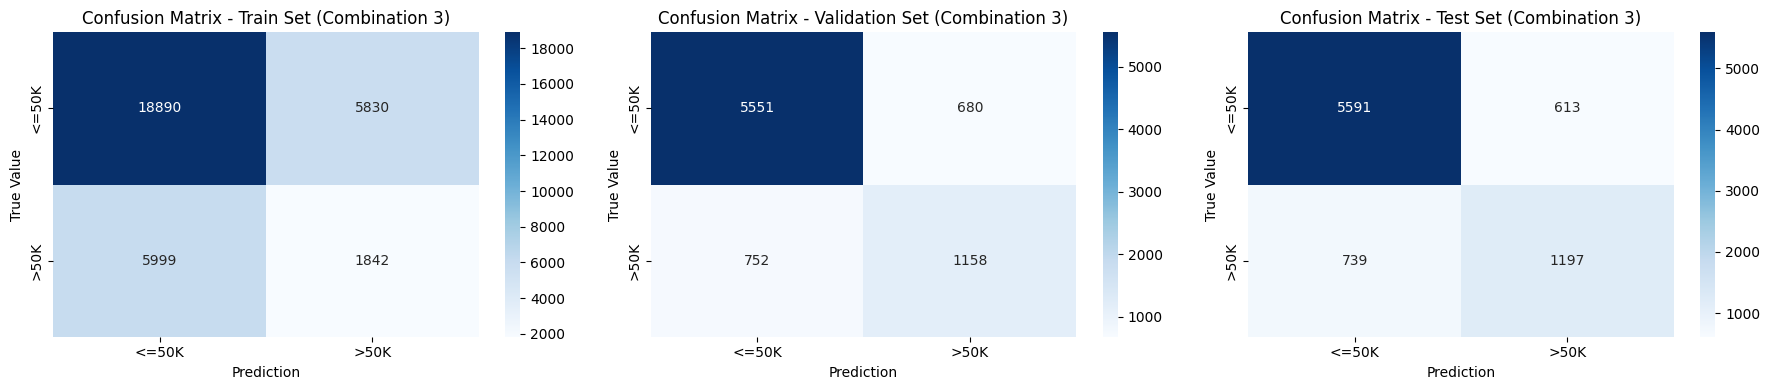

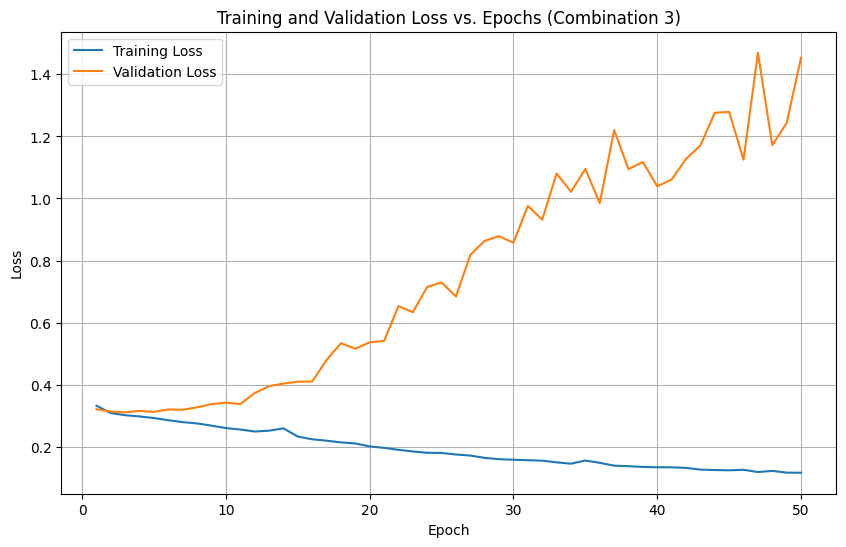

Completed evaluation for combination 3/5.
Starting evaluation for combination 4/5...
Using device: cpu
Epoch 1: train_loss=0.3253, val_loss=0.3144
Epoch 2: train_loss=0.3095, val_loss=0.3098
Epoch 3: train_loss=0.3053, val_loss=0.3186
Epoch 4: train_loss=0.3023, val_loss=0.3103
Epoch 5: train_loss=0.2990, val_loss=0.3202
Epoch 6: train_loss=0.2959, val_loss=0.3128
Epoch 7: train_loss=0.2920, val_loss=0.3175
Epoch 8: train_loss=0.2889, val_loss=0.3156
Epoch 9: train_loss=0.2842, val_loss=0.3259
Epoch 10: train_loss=0.2829, val_loss=0.3219
Epoch 11: train_loss=0.2750, val_loss=0.3247
Epoch 12: train_loss=0.2752, val_loss=0.3235
Epoch 13: train_loss=0.2717, val_loss=0.3434
Epoch 14: train_loss=0.2679, val_loss=0.3455
Epoch 15: train_loss=0.2663, val_loss=0.3431
Epoch 16: train_loss=0.2619, val_loss=0.3426
Epoch 17: train_loss=0.2623, val_loss=0.3683
Epoch 18: train_loss=0.2601, val_loss=0.3854
Epoch 19: train_loss=0.2547, val_loss=0.3911
Epoch 20: train_loss=0.2585, val_loss=0.3882
Epoch 

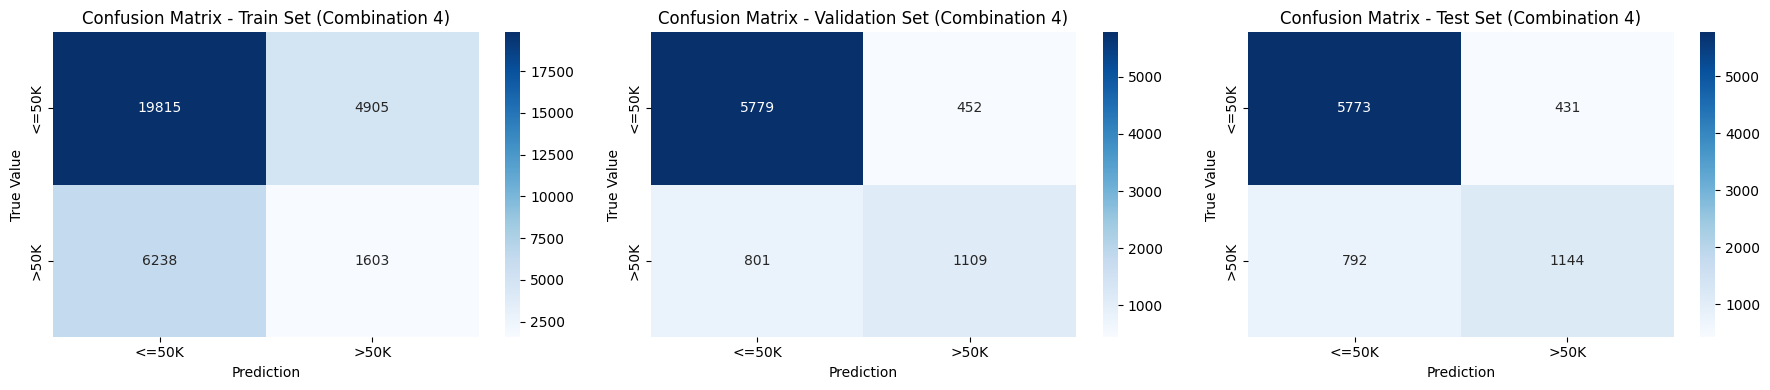

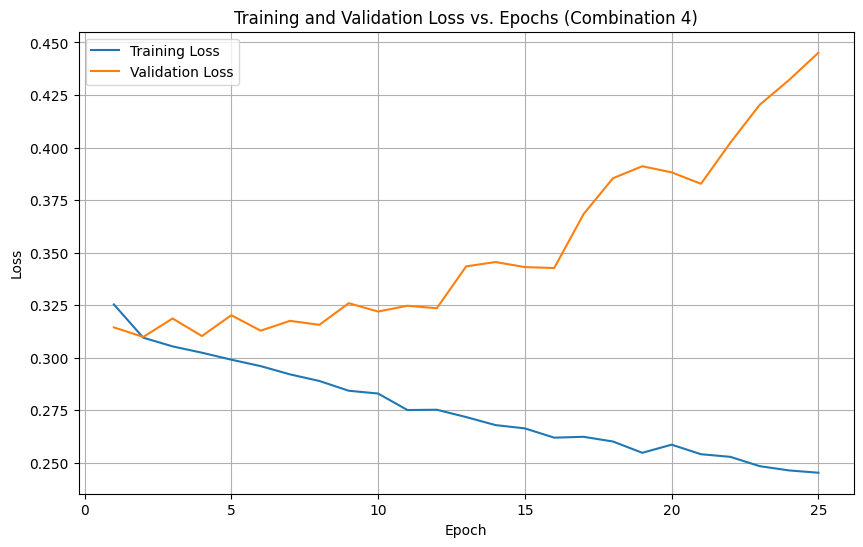

Completed evaluation for combination 4/5.
Starting evaluation for combination 5/5...
Using device: cpu
Epoch 1: train_loss=0.4502, val_loss=0.3271
Epoch 2: train_loss=0.3144, val_loss=0.3142
Epoch 3: train_loss=0.3071, val_loss=0.3131
Epoch 4: train_loss=0.3028, val_loss=0.3122
Epoch 5: train_loss=0.3014, val_loss=0.3112
Epoch 6: train_loss=0.2991, val_loss=0.3144
Epoch 7: train_loss=0.2949, val_loss=0.3140
Epoch 8: train_loss=0.2935, val_loss=0.3121
Epoch 9: train_loss=0.2912, val_loss=0.3152
Epoch 10: train_loss=0.2894, val_loss=0.3130
Epoch 11: train_loss=0.2868, val_loss=0.3135
Epoch 12: train_loss=0.2823, val_loss=0.3151
Epoch 13: train_loss=0.2791, val_loss=0.3169
Epoch 14: train_loss=0.2778, val_loss=0.3162
Epoch 15: train_loss=0.2734, val_loss=0.3184
Epoch 16: train_loss=0.2698, val_loss=0.3351
Epoch 17: train_loss=0.2668, val_loss=0.3208
Epoch 18: train_loss=0.2612, val_loss=0.3309
Epoch 19: train_loss=0.2570, val_loss=0.3268
Epoch 20: train_loss=0.2505, val_loss=0.3371
Epoch 

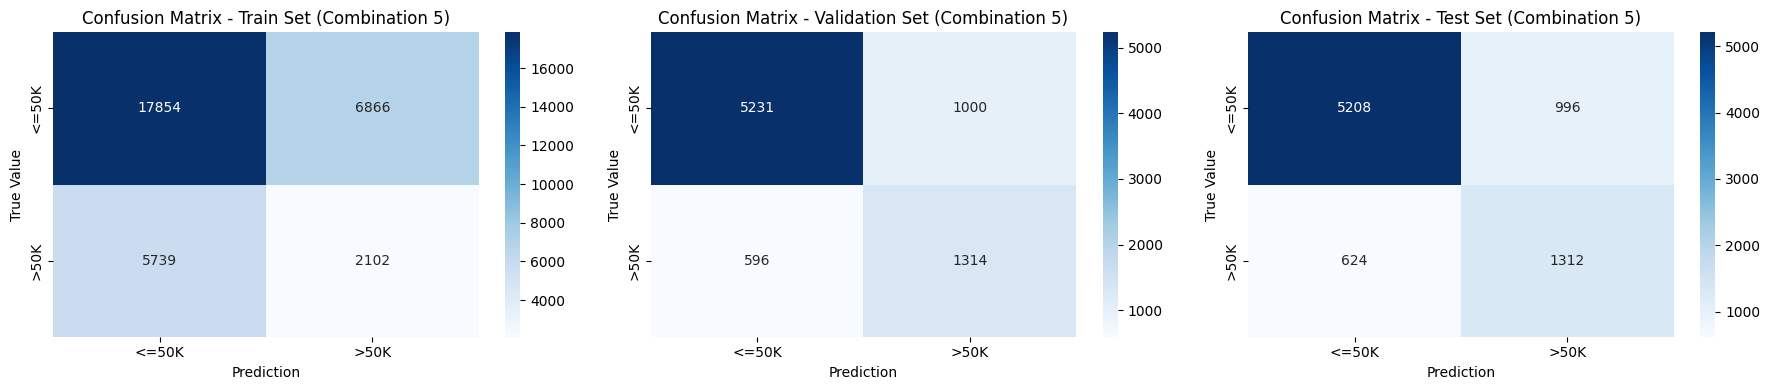

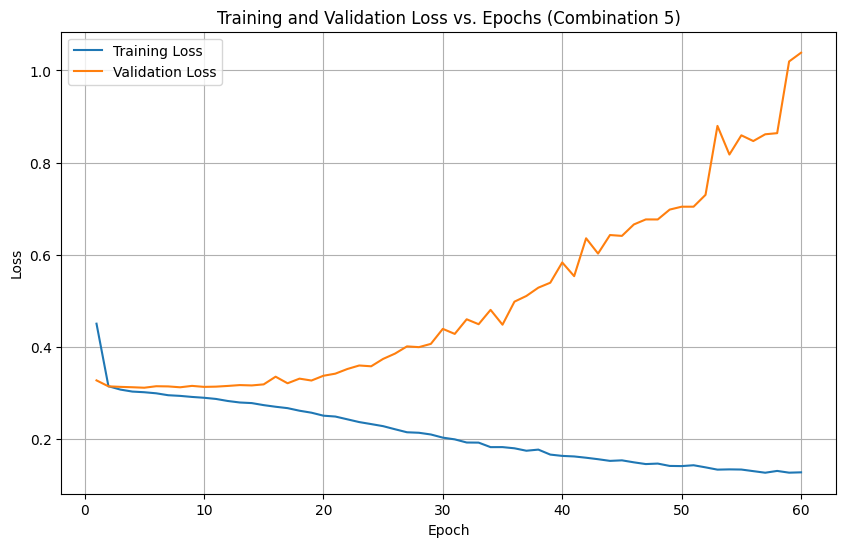

Completed evaluation for combination 5/5.

Evaluation Results for different Hyperparameter Combinations:


,hidden_layers,hidden_neurons,learning_rate,dropout_rate,num_epochs,batch_size,patience,train_accuracy,train_precision,train_recall,...,val_accuracy,val_precision,val_recall,val_f1_score,test_accuracy,test_precision,test_recall,test_f1_score,train_losses,val_losses
0,2,128,0.0010,0.3,30,64,5,0.651239,0.242566,0.211198,...,0.834787,0.676673,0.566492,0.616700,0.841032,0.700125,0.580062,0.634463,"[0.3347770580719578, 0.30635156113258405, 0.30...","[0.3123092568340941, 0.31170136320724223, 0.31..."
1,3,256,0.0005,0.4,40,128,7,0.647677,0.239788,0.213366,...,0.827294,0.652727,0.563874,0.605056,0.830344,0.668693,0.568182,0.614354,"[0.3492544571391444, 0.30764252980292633, 0.30...","[0.3138457648167811, 0.3110076828906993, 0.311..."
2,4,256,0.0010,0.5,50,64,10,0.636713,0.240094,0.234919,...,0.824100,0.630033,0.606283,0.617930,0.833907,0.661326,0.618285,0.639082,"[0.3320944547407904, 0.3083722352540404, 0.301...","[0.32074216151322416, 0.31327715848854315, 0.3..."
3,2,64,0.0050,0.2,25,32,3,0.657781,0.246312,0.204438,...,0.846088,0.710442,0.580628,0.639009,0.849754,0.726349,0.590909,0.651666,"[0.3252968647102844, 0.30948430743393496, 0.30...","[0.3143727075495718, 0.3098227473079038, 0.318..."
4,5,512,0.0001,0.6,60,256,15,0.612880,0.234389,0.268078,...,0.803955,0.567848,0.687958,0.622159,0.800983,0.568458,0.677686,0.618285,"[0.450246714674494, 0.31442019636813845, 0.307...","[0.32711616349577566, 0.3141628489192969, 0.31..."


Best Hyperparameter Combination based on Test F1-score:
{'hidden_layers': 2, 'hidden_neurons': 64, 'learning_rate': 0.005, 'dropout_rate': 0.2, 'num_epochs': 25, 'batch_size': 32, 'patience': 3, 'train_accuracy': 0.6577807806885538, 'train_precision': 0.24631223110018438, 'train_recall': 0.20443820941206478, 'train_f1_score': 0.22343020419541432, 'val_accuracy': 0.8460877042132416, 'val_precision': 0.7104420243433697, 'val_recall': 0.5806282722513089, 'val_f1_score': 0.6390089311437626, 'test_accuracy': 0.8497542997542997, 'test_precision': 0.7263492063492063, 'test_recall': 0.5909090909090909, 'test_f1_score': 0.6516661919681003, 'train_losses': [0.3252968647102844, 0.30948430743393496, 0.30532676635669814, 0.30231495654603846, 0.2990024115399791, 0.2959384593738172, 0.29200714279431494, 0.2888657699448153, 0.2842160772142889, 0.2828889997957863, 0.27503124943990925, 0.27517435667003054, 0.271685982009237, 0.2678607498853323, 0.2662943916806666, 0.26188281312196343, 0.262289149601173,

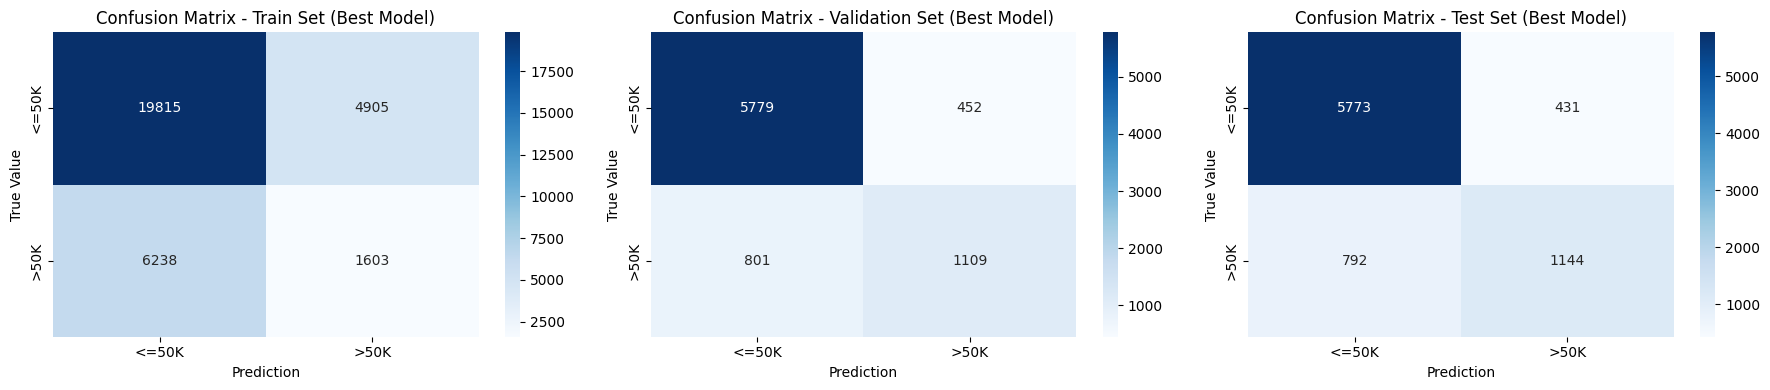

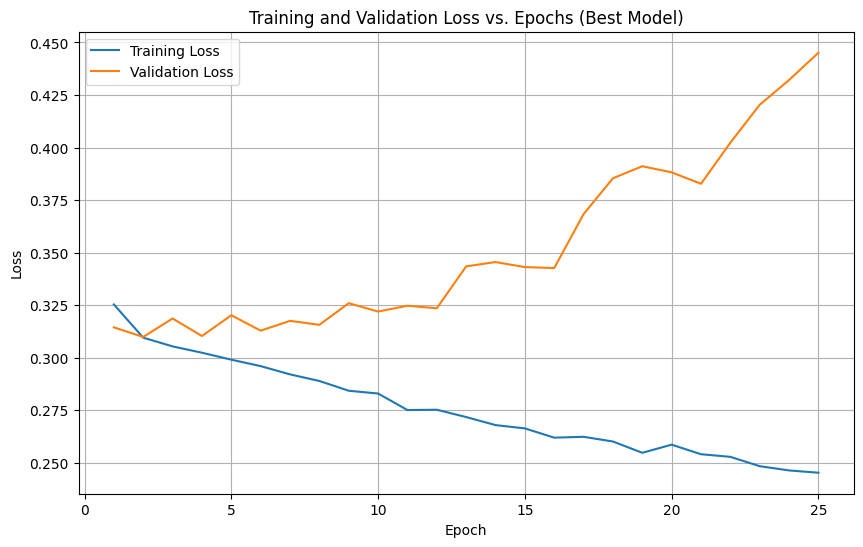

In [21]:
########### RED NEURONAL SIN EARLY Y DROP ##################

# Se busca hacer redes neuronales para 5 casos, y escoger el mejor con base al f1-score

def train_and_evaluate_mlp(x_train, y_train, x_val, y_val, x_test, y_test,
                           hidden_layers, hidden_neurons, learning_rate,
                           num_epochs, batch_size):
    """Trains and evaluates an MLP model with specified hyperparameters (without dropout and early stopping)."""

    # Usar GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Arquitectura
    class MLP(nn.Module):
        def __init__(self, input_size, hidden_layers, hidden_neurons, output_size):
            super(MLP, self).__init__()
            layers = []
            # Capa inicial
            layers.append(nn.Linear(input_size, hidden_neurons))
            layers.append(nn.ReLU())
            # Hidden layers
            for i in range(hidden_layers - 1):
                layers.append(nn.Linear(hidden_neurons, hidden_neurons))
                layers.append(nn.ReLU())
            # Output layer
            layers.append(nn.Linear(hidden_neurons, output_size))
            layers.append(nn.Sigmoid())
            self.model = nn.Sequential(*layers)


        def forward(self, x):
            return self.model(x)

    torch.manual_seed(45)

    # Instanciar el modelo
    model = MLP(input_size=x_train.shape[1],
                hidden_layers=hidden_layers,
                hidden_neurons=hidden_neurons,
                output_size=1).to(device)

    # Función de perdida y optimización
    criterion = nn.BCELoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)

    # Tensores
    train_dataset = TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train))
    val_dataset = TensorDataset(torch.Tensor(x_val), torch.Tensor(y_val))
    test_dataset = TensorDataset(torch.Tensor(x_test), torch.Tensor(y_test))

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)


    # Lista para almacenar valores
    train_losses = []
    val_losses = []


    # Loop de entrenamienot
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for batch_x, batch_y in train_loader:

            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            predictions = model(batch_x)
            loss = criterion(predictions, batch_y.unsqueeze(1))

            # Backward pass y optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * batch_x.size(0)
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_x, batch_y in val_loader:

                batch_x, batch_y = batch_x.to(device), batch_y.to(device)

                predictions = model(batch_x)
                loss = criterion(predictions, batch_y.unsqueeze(1))
                val_loss += loss.item() * batch_x.size(0)
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}: train_loss={train_loss:.4f}, val_loss={val_loss:.4f}")


    # Evaluar en el test
    model.eval()
    y_train_pred_mlp_binary = []
    y_val_pred_mlp_binary = []
    y_test_pred_mlp_binary = []

    with torch.no_grad():
        for batch_x, batch_y in train_loader:
             batch_x = batch_x.to(device)
             predictions = model(batch_x)
             y_train_pred_mlp_binary.extend((predictions > 0.5).long().squeeze().cpu().numpy())

        for batch_x, batch_y in val_loader:
             batch_x = batch_x.to(device)
             predictions = model(batch_x)
             y_val_pred_mlp_binary.extend((predictions > 0.5).long().squeeze().cpu().numpy())

        for batch_x, batch_y in test_loader:
            batch_x = batch_x.to(device)
            predictions = model(batch_x)
            y_test_pred_mlp_binary.extend((predictions > 0.5).long().squeeze().cpu().numpy())


    # Calcular metricas
    accuracy_train = accuracy_score(y_train, y_train_pred_mlp_binary)
    precision_train = precision_score(y_train, y_train_pred_mlp_binary)
    recall_train = recall_score(y_train, y_train_pred_mlp_binary)
    f1_train = f1_score(y_train, y_train_pred_mlp_binary)
    cm_train = confusion_matrix(y_train, y_train_pred_mlp_binary)


    accuracy_val = accuracy_score(y_val, y_val_pred_mlp_binary)
    precision_val = precision_score(y_val, y_val_pred_mlp_binary)
    recall_val = recall_score(y_val, y_val_pred_mlp_binary)
    f1_val = f1_score(y_val, y_val_pred_mlp_binary)
    cm_val = confusion_matrix(y_val, y_val_pred_mlp_binary)


    accuracy_test = accuracy_score(y_test, y_test_pred_mlp_binary)
    precision_test = precision_score(y_test, y_test_pred_mlp_binary)
    recall_test = recall_score(y_test, y_test_pred_mlp_binary)
    f1_test = f1_score(y_test, y_test_pred_mlp_binary)
    cm_test = confusion_matrix(y_test, y_test_pred_mlp_binary)


    return accuracy_train, precision_train, recall_train, f1_train, cm_train, \
           accuracy_val, precision_val, recall_val, f1_val, cm_val, \
           accuracy_test, precision_test, recall_test, f1_test, cm_test, \
           train_losses, val_losses
hyperparameter_combinations = [
    {
        'hidden_layers': 2,
        'hidden_neurons': 128,
        'learning_rate': 0.001,
        'dropout_rate': 0.3,
        'num_epochs': 30,
        'batch_size': 64,
        'patience': 5
    },
    {
        'hidden_layers': 3,
        'hidden_neurons': 256,
        'learning_rate': 0.0005,
        'dropout_rate': 0.4,
        'num_epochs': 40,
        'batch_size': 128,
        'patience': 7
    },
    {
        'hidden_layers': 4,
        'hidden_neurons': 256,
        'learning_rate': 0.001,
        'dropout_rate': 0.5,
        'num_epochs': 50,
        'batch_size': 64,
        'patience': 10
    },
    {
        'hidden_layers': 2,
        'hidden_neurons': 64,
        'learning_rate': 0.005,
        'dropout_rate': 0.2,
        'num_epochs': 25,
        'batch_size': 32,
        'patience': 3
    },
    {
        'hidden_layers': 5,
        'hidden_neurons': 512,
        'learning_rate': 0.0001,
        'dropout_rate': 0.6,
        'num_epochs': 60,
        'batch_size': 256,
        'patience': 15
    }
]

evaluation_results = []

for i, params in enumerate(hyperparameter_combinations):
    print(f"Starting evaluation for combination {i+1}/{len(hyperparameter_combinations)}...")
    accuracy_train, precision_train, recall_train, f1_train, cm_train, \
    accuracy_val, precision_val, recall_val, f1_val, cm_val, \
    accuracy_test, precision_test, recall_test, f1_test, cm_test, \
    train_losses, val_losses = train_and_evaluate_mlp(
        x_train_processed, y_train_encoded,
        x_val_processed, y_val_encoded,
        x_test_processed, y_test_encoded,
        hidden_layers=params['hidden_layers'],
        hidden_neurons=params['hidden_neurons'],
        learning_rate=params['learning_rate'],
        num_epochs=params['num_epochs'],
        batch_size=params['batch_size']
    )

    results = params.copy()
    results.update({
        'train_accuracy': accuracy_train,
        'train_precision': precision_train,
        'train_recall': recall_train,
        'train_f1_score': f1_train,
        'val_accuracy': accuracy_val,
        'val_precision': precision_val,
        'val_recall': recall_val,
        'val_f1_score': f1_val,
        'test_accuracy': accuracy_test,
        'test_precision': precision_test,
        'test_recall': recall_test,
        'test_f1_score': f1_test,
        'train_losses': train_losses,
        'val_losses': val_losses
    })
    evaluation_results.append(results)

    print(f"\nMetrics for combination {i+1}:")
    print("Train Set:")
    print(f"  Accuracy: {accuracy_train:.4f}, Precision: {1-precision_train:.4f}, Recall: {1-recall_train:.4f}, F1 Score: {1-f1_train:.4f}")
    print("Validation Set:")
    print(f"  Accuracy: {accuracy_val:.4f}, Precision: {precision_val:.4f}, Recall: {recall_val:.4f}, F1 Score: {f1_val:.4f}")
    print("Test Set:")
    print(f"  Accuracy: {accuracy_test:.4f}, Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1 Score: {f1_test:.4f}")


    # Imprimir matrices de confusión
    plt.figure(figsize=(18, 4))

    plt.subplot(1, 3, 1)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.xlabel('Prediction')
    plt.ylabel('True Value')
    plt.title(f'Confusion Matrix - Train Set (Combination {i+1})')

    plt.subplot(1, 3, 2)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.xlabel('Prediction')
    plt.ylabel('True Value')
    plt.title(f'Confusion Matrix - Validation Set (Combination {i+1})')

    plt.subplot(1, 3, 3)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.xlabel('Prediction')
    plt.ylabel('True Value')
    plt.title(f'Confusion Matrix - Test Set (Combination {i+1})')

    plt.tight_layout()
    plt.show()

    # Graficas de perdidas
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss vs. Epochs (Combination {i+1})')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Completed evaluation for combination {i+1}/{len(hyperparameter_combinations)}.")


print("\nEvaluation Results for different Hyperparameter Combinations:")
display(pd.DataFrame(evaluation_results))

# Encontrar el mejor modelo con base a f1-score
best_model_result = max(evaluation_results, key=lambda x: x['test_f1_score'])

print(f"Best Hyperparameter Combination based on Test F1-score:")
print(best_model_result)

# Calcular de nuevo para graficar
accuracy_train, precision_train, recall_train, f1_train, cm_train, \
accuracy_val, precision_val, recall_val, f1_val, cm_val, \
accuracy_test, precision_test, recall_test, f1_test, cm_test, \
train_losses, val_losses = train_and_evaluate_mlp(
    x_train_processed, y_train_encoded,
    x_val_processed, y_val_encoded,
    x_test_processed, y_test_encoded,
    hidden_layers=best_model_result['hidden_layers'],
    hidden_neurons=best_model_result['hidden_neurons'],
    learning_rate=best_model_result['learning_rate'],
    num_epochs=best_model_result['num_epochs'],
    batch_size=best_model_result['batch_size']
)

print("\nMetrics for the Best Model:")
print("Train Set:")
print(f"  Accuracy: {accuracy_train:.4f}, Precision: {1-precision_train:.4f}, Recall: {1-recall_train:.4f}, F1 Score: {1-f1_train:.4f}")
print("Validation Set:")
print(f"  Accuracy: {accuracy_val:.4f}, Precision: {precision_val:.4f}, Recall: {recall_val:.4f}, F1 Score: {f1_val:.4f}")
print("Test Set:")
print(f"  Accuracy: {accuracy_test:.4f}, Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1 Score: {f1_test:.4f}")

# Imprimir graficas del mejor modelo
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Prediction')
plt.ylabel('True Value')
plt.title('Confusion Matrix - Train Set (Best Model)')

plt.subplot(1, 3, 2)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Prediction')
plt.ylabel('True Value')
plt.title('Confusion Matrix - Validation Set (Best Model)')

plt.subplot(1, 3, 3)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Prediction')
plt.ylabel('True Value')
plt.title('Confusion Matrix - Test Set (Best Model)')

plt.tight_layout()
plt.show()

# Curva de perdida del mejor modelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epochs (Best Model)')
plt.legend()
plt.grid(True)
plt.show()

Starting evaluation for combination 1/5...
Using device: cpu
Epoch 1: train_loss=0.3421, val_loss=0.3126
Epoch 2: train_loss=0.3127, val_loss=0.3116
Epoch 3: train_loss=0.3092, val_loss=0.3110
Epoch 4: train_loss=0.3042, val_loss=0.3113
Epoch 5: train_loss=0.3029, val_loss=0.3118
Epoch 6: train_loss=0.3004, val_loss=0.3109
Epoch 7: train_loss=0.2984, val_loss=0.3095
Epoch 8: train_loss=0.2994, val_loss=0.3084
Epoch 9: train_loss=0.2986, val_loss=0.3104
Epoch 10: train_loss=0.2962, val_loss=0.3111
Epoch 11: train_loss=0.2920, val_loss=0.3125
Epoch 12: train_loss=0.2947, val_loss=0.3115
Epoch 13: train_loss=0.2926, val_loss=0.3100
Early stopping after 13 epochs.

Metrics for combination 1:
Train Set:
  Accuracy: 0.6578, Precision: 0.7496, Recall: 0.7888, F1 Score: 0.7709
Validation Set:
  Accuracy: 0.8569, Precision: 0.7335, Recall: 0.6126, F1 Score: 0.6676
Test Set:
  Accuracy: 0.8603, Precision: 0.7489, Recall: 0.6209, F1 Score: 0.6789


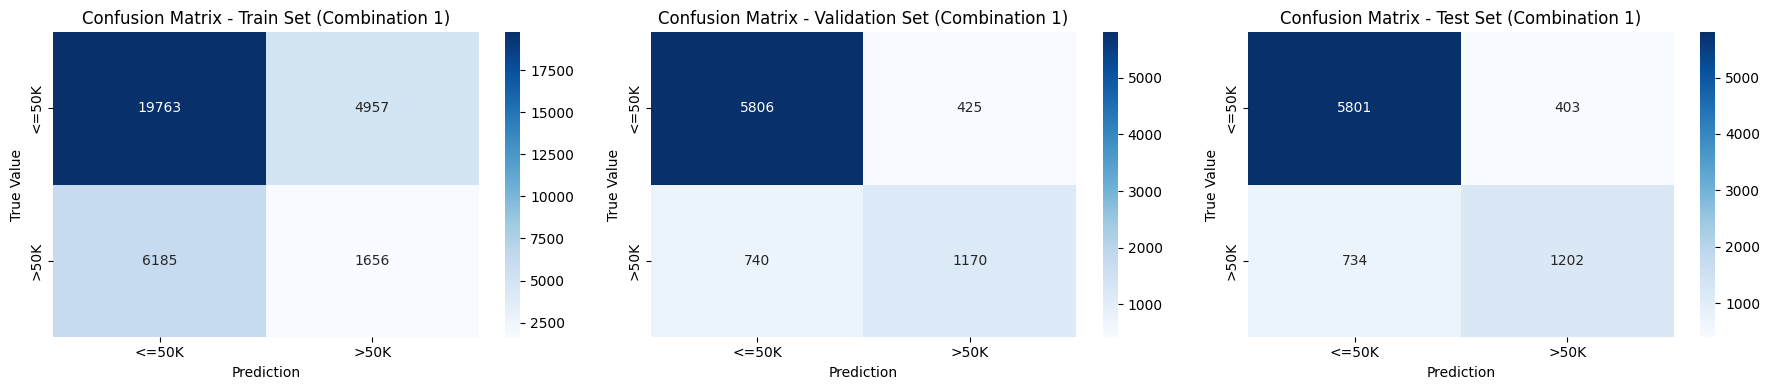

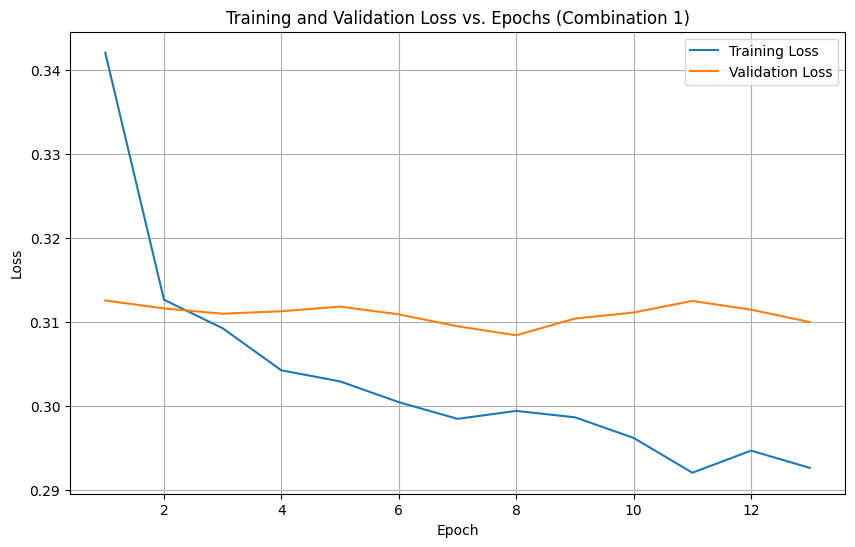

Completed evaluation for combination 1/5.
Starting evaluation for combination 2/5...
Using device: cpu
Epoch 1: train_loss=0.3673, val_loss=0.3146
Epoch 2: train_loss=0.3181, val_loss=0.3113
Epoch 3: train_loss=0.3116, val_loss=0.3106
Epoch 4: train_loss=0.3084, val_loss=0.3099
Epoch 5: train_loss=0.3060, val_loss=0.3089
Epoch 6: train_loss=0.3040, val_loss=0.3078
Epoch 7: train_loss=0.3020, val_loss=0.3110
Epoch 8: train_loss=0.3003, val_loss=0.3098
Epoch 9: train_loss=0.2981, val_loss=0.3082
Epoch 10: train_loss=0.2998, val_loss=0.3104
Epoch 11: train_loss=0.2953, val_loss=0.3086
Epoch 12: train_loss=0.2927, val_loss=0.3086
Epoch 13: train_loss=0.2925, val_loss=0.3099
Early stopping after 13 epochs.

Metrics for combination 2:
Train Set:
  Accuracy: 0.6594, Precision: 0.7522, Recall: 0.7965, F1 Score: 0.7765
Validation Set:
  Accuracy: 0.8560, Precision: 0.7341, Recall: 0.6058, F1 Score: 0.6638
Test Set:
  Accuracy: 0.8638, Precision: 0.7609, Recall: 0.6229, F1 Score: 0.6850


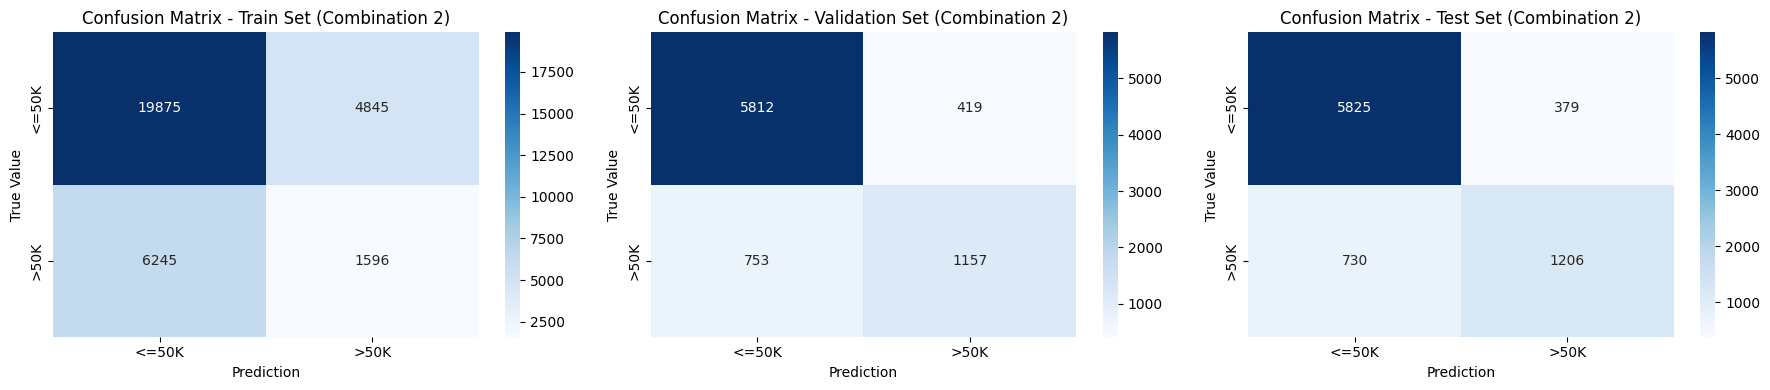

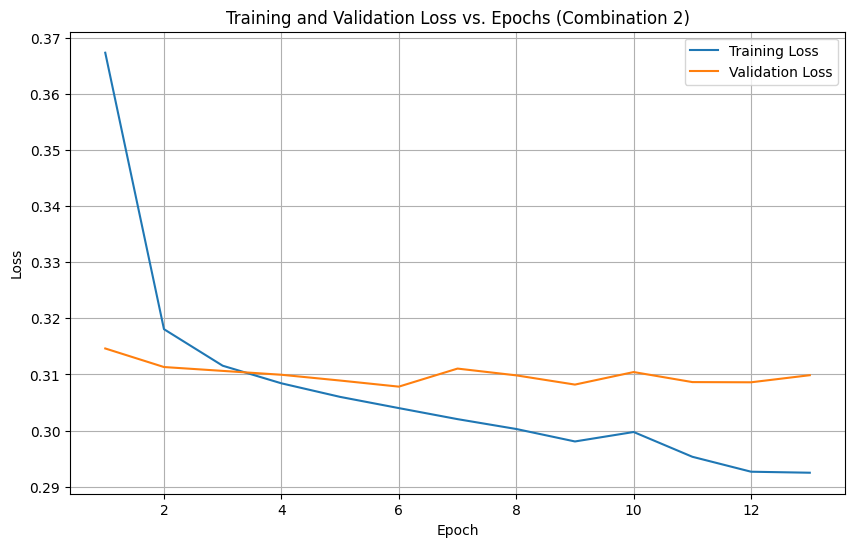

Completed evaluation for combination 2/5.
Starting evaluation for combination 3/5...
Using device: cpu
Epoch 1: train_loss=0.3530, val_loss=0.3197
Epoch 2: train_loss=0.3221, val_loss=0.3125
Epoch 3: train_loss=0.3189, val_loss=0.3175
Epoch 4: train_loss=0.3129, val_loss=0.3110
Epoch 5: train_loss=0.3143, val_loss=0.3143
Epoch 6: train_loss=0.3094, val_loss=0.3108
Epoch 7: train_loss=0.3116, val_loss=0.3093
Epoch 8: train_loss=0.3050, val_loss=0.3095
Epoch 9: train_loss=0.3077, val_loss=0.3127
Epoch 10: train_loss=0.3075, val_loss=0.3100
Epoch 11: train_loss=0.3010, val_loss=0.3128
Epoch 12: train_loss=0.3015, val_loss=0.3092
Epoch 13: train_loss=0.3021, val_loss=0.3094
Epoch 14: train_loss=0.3026, val_loss=0.3105
Epoch 15: train_loss=0.2972, val_loss=0.3127
Epoch 16: train_loss=0.2933, val_loss=0.3116
Epoch 17: train_loss=0.2953, val_loss=0.3116
Epoch 18: train_loss=0.3004, val_loss=0.3126
Epoch 19: train_loss=0.2910, val_loss=0.3180
Epoch 20: train_loss=0.2941, val_loss=0.3146
Epoch 

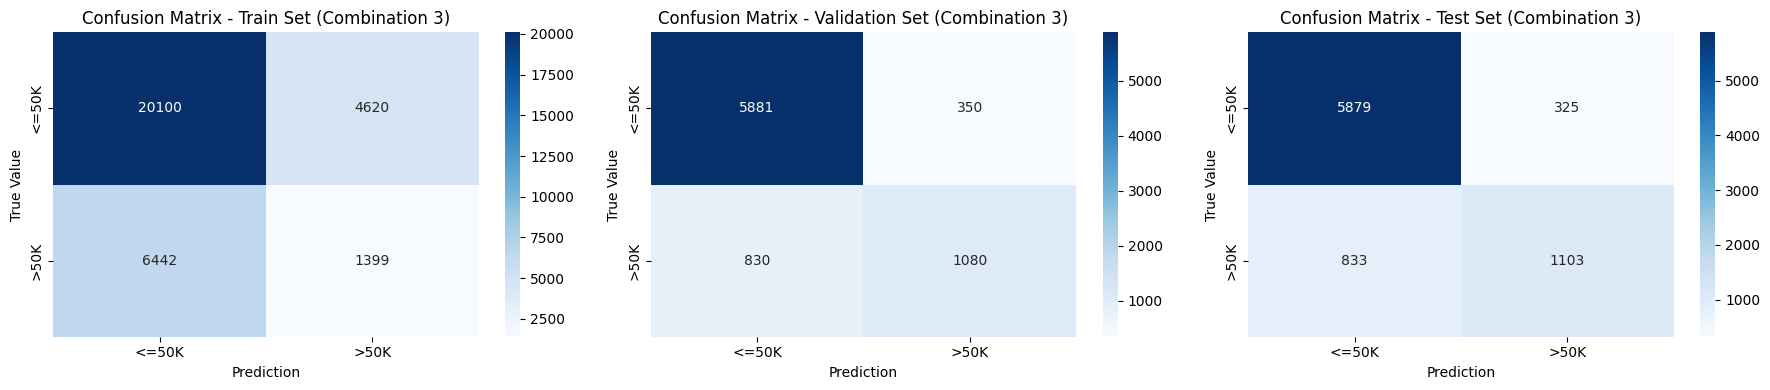

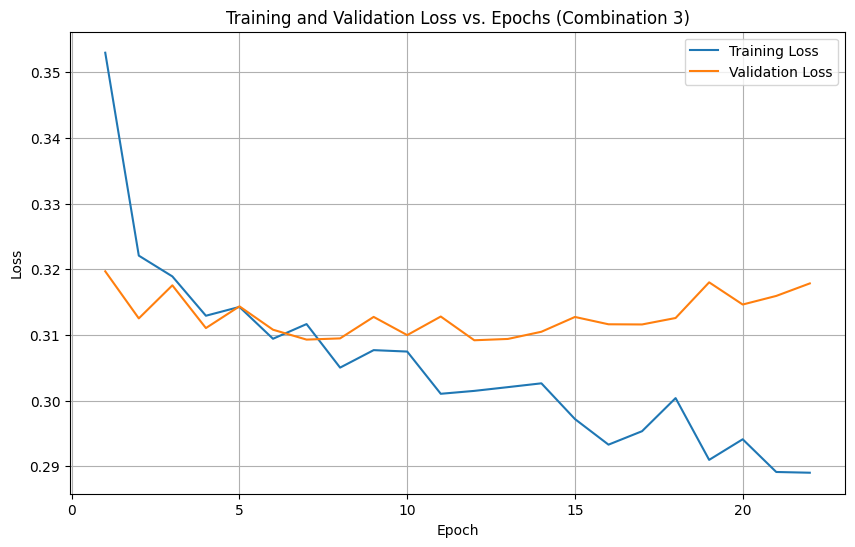

Completed evaluation for combination 3/5.
Starting evaluation for combination 4/5...
Using device: cpu
Epoch 1: train_loss=0.3309, val_loss=0.3139
Epoch 2: train_loss=0.3216, val_loss=0.3148
Epoch 3: train_loss=0.3154, val_loss=0.3145
Epoch 4: train_loss=0.3098, val_loss=0.3106
Epoch 5: train_loss=0.3181, val_loss=0.3082
Epoch 6: train_loss=0.3135, val_loss=0.3083
Epoch 7: train_loss=0.3152, val_loss=0.3102
Epoch 8: train_loss=0.3078, val_loss=0.3110
Early stopping after 8 epochs.

Metrics for combination 4:
Train Set:
  Accuracy: 0.6574, Precision: 0.7625, Recall: 0.8087, F1 Score: 0.7881
Validation Set:
  Accuracy: 0.8544, Precision: 0.7352, Recall: 0.5932, F1 Score: 0.6566
Test Set:
  Accuracy: 0.8586, Precision: 0.7540, Recall: 0.6018, F1 Score: 0.6693


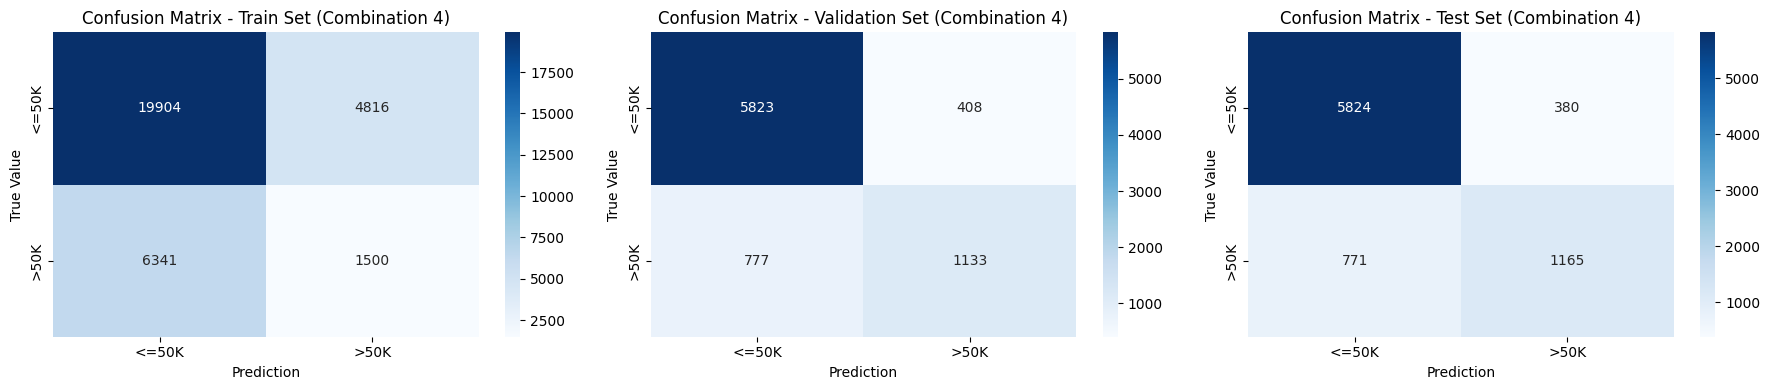

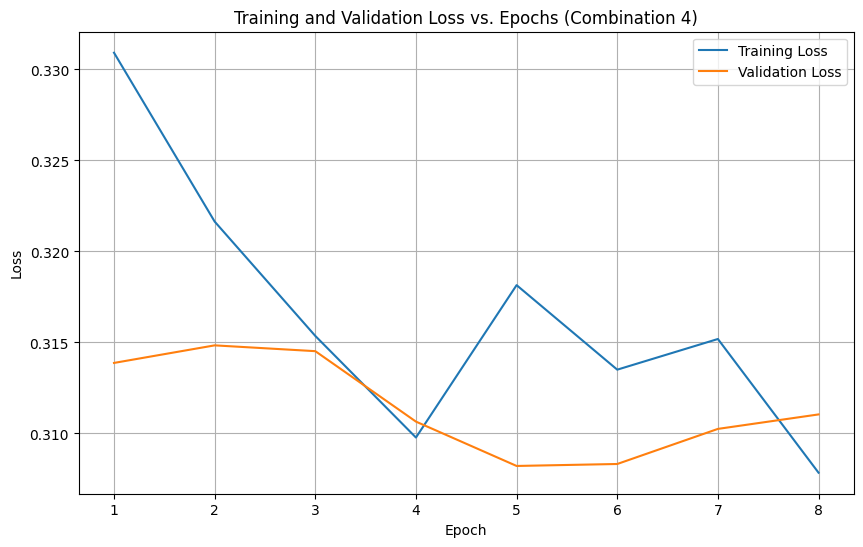

Completed evaluation for combination 4/5.
Starting evaluation for combination 5/5...
Using device: cpu
Epoch 1: train_loss=0.5144, val_loss=0.3799
Epoch 2: train_loss=0.3764, val_loss=0.3552
Epoch 3: train_loss=0.3525, val_loss=0.3286
Epoch 4: train_loss=0.3360, val_loss=0.3254
Epoch 5: train_loss=0.3303, val_loss=0.3215
Epoch 6: train_loss=0.3285, val_loss=0.3199
Epoch 7: train_loss=0.3228, val_loss=0.3177
Epoch 8: train_loss=0.3231, val_loss=0.3153
Epoch 9: train_loss=0.3207, val_loss=0.3145
Epoch 10: train_loss=0.3187, val_loss=0.3165
Epoch 11: train_loss=0.3162, val_loss=0.3132
Epoch 12: train_loss=0.3172, val_loss=0.3138
Epoch 13: train_loss=0.3153, val_loss=0.3161
Epoch 14: train_loss=0.3159, val_loss=0.3155
Epoch 15: train_loss=0.3141, val_loss=0.3125
Epoch 16: train_loss=0.3139, val_loss=0.3132
Epoch 17: train_loss=0.3120, val_loss=0.3146
Epoch 18: train_loss=0.3131, val_loss=0.3159
Epoch 19: train_loss=0.3097, val_loss=0.3119
Epoch 20: train_loss=0.3104, val_loss=0.3132
Epoch 

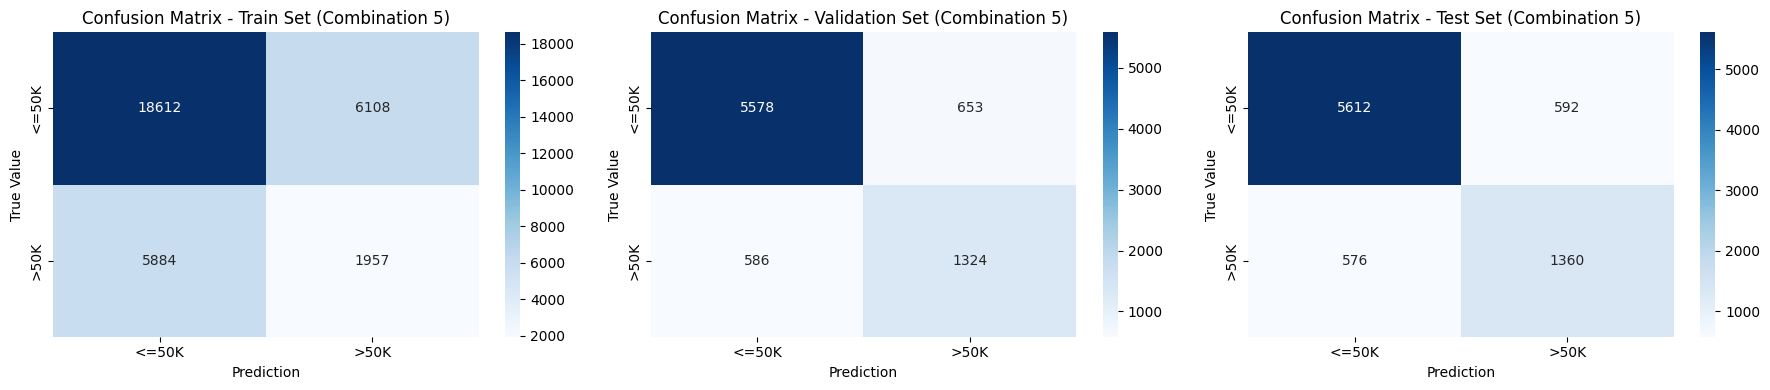

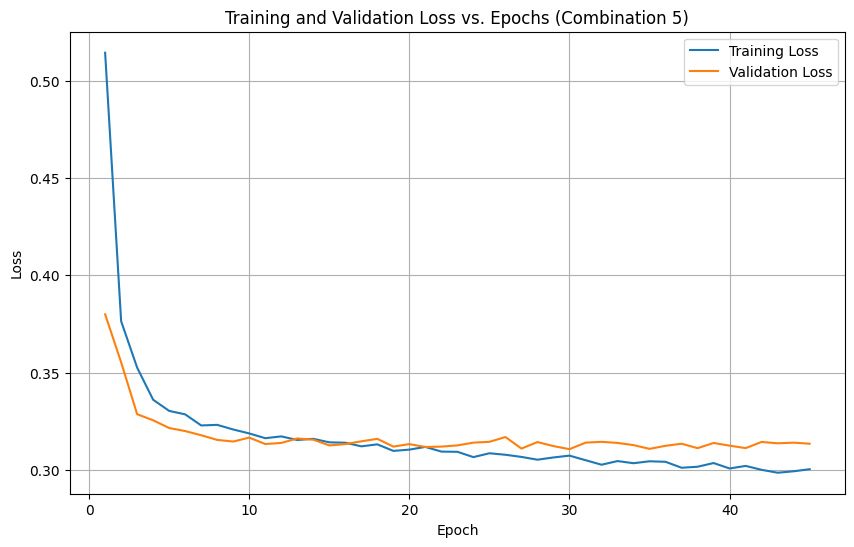

Completed evaluation for combination 5/5.

Evaluation Results for different Hyperparameter Combinations:


,hidden_layers,hidden_neurons,learning_rate,dropout_rate,num_epochs,batch_size,patience,train_accuracy,train_precision,train_recall,...,val_accuracy,val_precision,val_recall,val_f1_score,test_accuracy,test_precision,test_recall,test_f1_score,train_losses,val_losses
0,2,128,0.0010,0.3,30,64,5,0.657811,0.250416,0.211198,...,0.856897,0.733542,0.612565,0.667618,0.860319,0.748910,0.620868,0.678904,"[0.3421033374030007, 0.312654391401124, 0.3092...","[0.3125625063022632, 0.31161103374819515, 0.31..."
1,3,256,0.0005,0.4,40,128,7,0.659408,0.247788,0.203545,...,0.856037,0.734137,0.605759,0.663798,0.863759,0.760883,0.622934,0.685033,"[0.36730398678456694, 0.31806501358741074, 0.3...","[0.3146286646471374, 0.3113224519044435, 0.310..."
2,4,256,0.0010,0.5,50,64,10,0.660268,0.232431,0.178421,...,0.855055,0.755245,0.565445,0.646707,0.857740,0.772409,0.569731,0.655767,"[0.35295406132108154, 0.3220672068488689, 0.31...","[0.3196787021476709, 0.3125136690121613, 0.317..."
3,2,64,0.0050,0.2,25,32,3,0.657351,0.237492,0.191302,...,0.854440,0.735237,0.593194,0.656621,0.858600,0.754045,0.601756,0.669348,"[0.3309171860573395, 0.3216406661222075, 0.315...","[0.3138733622908021, 0.31483838237074346, 0.31..."
4,5,512,0.0001,0.6,60,256,15,0.631707,0.242653,0.249586,...,0.847807,0.669702,0.693194,0.681245,0.856511,0.696721,0.702479,0.699588,"[0.5144333623109177, 0.3763905604084229, 0.352...","[0.37994667815570526, 0.35523871232742554, 0.3..."


Best Hyperparameter Combination based on Test F1-score:
{'hidden_layers': 5, 'hidden_neurons': 512, 'learning_rate': 0.0001, 'dropout_rate': 0.6, 'num_epochs': 60, 'batch_size': 256, 'patience': 15, 'train_accuracy': 0.6317066429163724, 'train_precision': 0.2426534407935524, 'train_recall': 0.2495855120520342, 'train_f1_score': 0.2460706651578021, 'val_accuracy': 0.8478073946689596, 'val_precision': 0.6697015680323722, 'val_recall': 0.6931937172774869, 'val_f1_score': 0.6812451762284538, 'test_accuracy': 0.8565110565110565, 'test_precision': 0.6967213114754098, 'test_recall': 0.7024793388429752, 'test_f1_score': 0.6995884773662552, 'train_losses': [0.5144333623109177, 0.3763905604084229, 0.35251149489232253, 0.3359925961220595, 0.33026926674859236, 0.32848437909855016, 0.3227914867323215, 0.32308932310338945, 0.3207150932540655, 0.318683744116646, 0.316237479268009, 0.31716016225544486, 0.31531223239302947, 0.315920919380362, 0.3141017057593546, 0.3139044410018501, 0.31204540257477936,

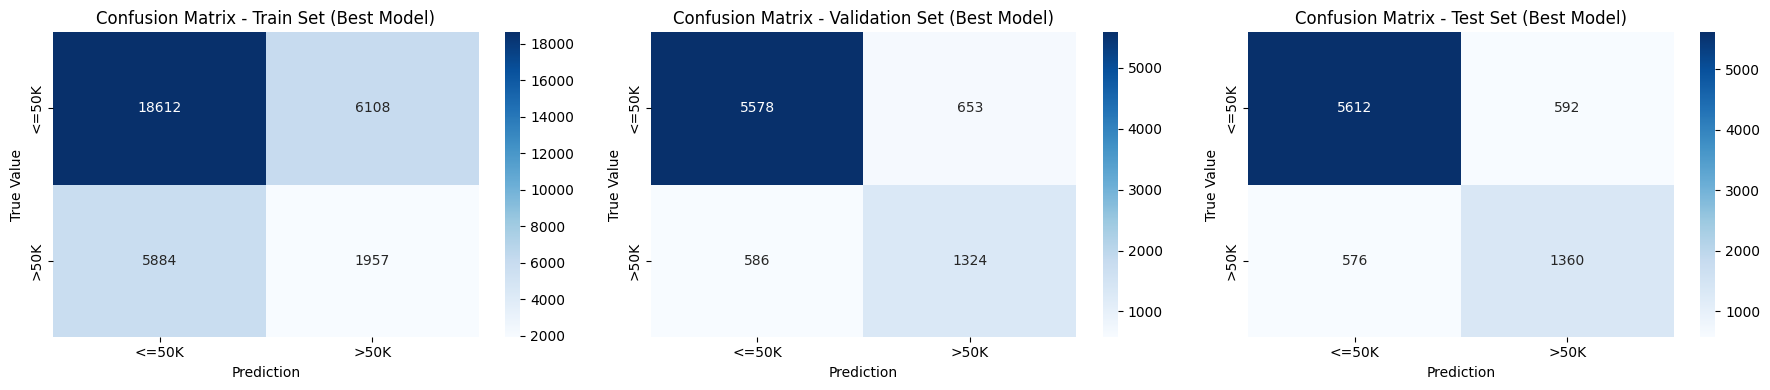

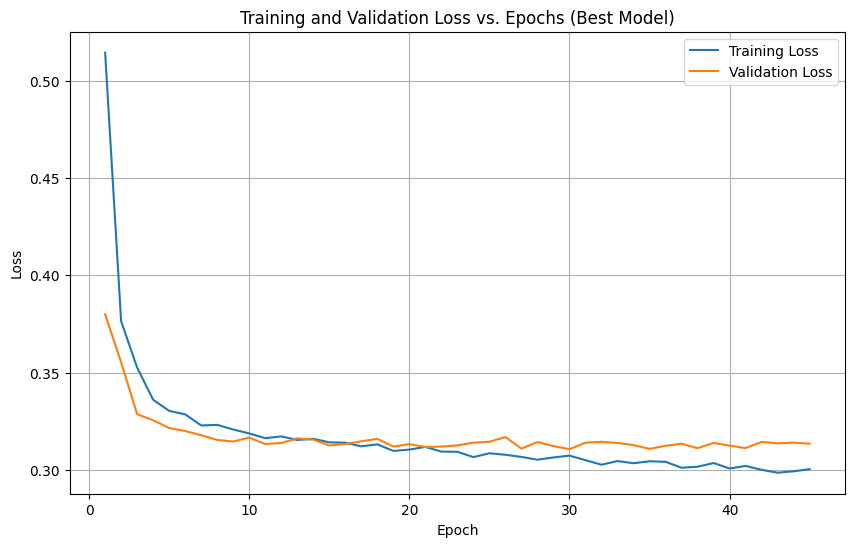

In [23]:
############ MPL DROP OUT CON EL MEJOR AL FINAL####################

def train_and_evaluate_mlp(x_train, y_train, x_val, y_val, x_test, y_test,
                           hidden_layers, hidden_neurons, learning_rate,
                           dropout_rate, num_epochs, batch_size, patience):
    """Trains and evaluates an MLP model with specified hyperparameters."""


    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Arquitectura
    class MLP(nn.Module):
        def __init__(self, input_size, hidden_layers, hidden_neurons, output_size, dropout_rate=0.5):
            super(MLP, self).__init__()
            layers = []
            # Capa inicial
            layers.append(nn.Linear(input_size, hidden_neurons))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            # Hidden layers
            for i in range(hidden_layers - 1):
                layers.append(nn.Linear(hidden_neurons, hidden_neurons))
                layers.append(nn.ReLU())
                layers.append(nn.Dropout(dropout_rate))
            # Output layer
            layers.append(nn.Linear(hidden_neurons, output_size))
            layers.append(nn.Sigmoid())
            self.model = nn.Sequential(*layers)

        def forward(self, x):
            return self.model(x)

    torch.manual_seed(45)

    # Instanciar
    model = MLP(input_size=x_train.shape[1],
                hidden_layers=hidden_layers,
                hidden_neurons=hidden_neurons,
                output_size=1,
                dropout_rate=dropout_rate).to(device)

    # Función de perida y optimización
    criterion = nn.BCELoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)

    # Tensores
    train_dataset = TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train))
    val_dataset = TensorDataset(torch.Tensor(x_val), torch.Tensor(y_val))
    test_dataset = TensorDataset(torch.Tensor(x_test), torch.Tensor(y_test))

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    # Lists para guardar datos
    train_losses = []
    val_losses = []

    # Early stopping
    best_val_loss = float('inf')
    epochs_without_improvement = 0

    # Loop de entrenamiento
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for batch_x, batch_y in train_loader:

            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            predictions = model(batch_x)
            loss = criterion(predictions, batch_y.unsqueeze(1))

            # Backward pass y optimización
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * batch_x.size(0)
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_x, batch_y in val_loader:

                batch_x, batch_y = batch_x.to(device), batch_y.to(device)

                predictions = model(batch_x)
                loss = criterion(predictions, batch_y.unsqueeze(1))
                val_loss += loss.item() * batch_x.size(0)
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}: train_loss={train_loss:.4f}, val_loss={val_loss:.4f}")

        # Revisión Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
            # Para guardar el mejor modelo
            # torch.save(model.state_dict(), 'best_model.pth')
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                print(f"Early stopping after {epoch+1} epochs.")
                break

    # Evaluar en el test
    model.eval()
    y_train_pred_mlp_binary = []
    y_val_pred_mlp_binary = []
    y_test_pred_mlp_binary = []

    with torch.no_grad():
        for batch_x, batch_y in train_loader:
             batch_x = batch_x.to(device)
             predictions = model(batch_x)
             y_train_pred_mlp_binary.extend((predictions > 0.5).long().squeeze().cpu().numpy())

        for batch_x, batch_y in val_loader:
             batch_x = batch_x.to(device)
             predictions = model(batch_x)
             y_val_pred_mlp_binary.extend((predictions > 0.5).long().squeeze().cpu().numpy())

        for batch_x, batch_y in test_loader:

            batch_x = batch_x.to(device)
            predictions = model(batch_x)

            y_test_pred_mlp_binary.extend((predictions > 0.5).long().squeeze().cpu().numpy())


    # Calcular metricas
    accuracy_train = accuracy_score(y_train, y_train_pred_mlp_binary)
    precision_train = precision_score(y_train, y_train_pred_mlp_binary)
    recall_train = recall_score(y_train, y_train_pred_mlp_binary)
    f1_train = f1_score(y_train, y_train_pred_mlp_binary)
    cm_train = confusion_matrix(y_train, y_train_pred_mlp_binary)


    accuracy_val = accuracy_score(y_val, y_val_pred_mlp_binary)
    precision_val = precision_score(y_val, y_val_pred_mlp_binary)
    recall_val = recall_score(y_val, y_val_pred_mlp_binary)
    f1_val = f1_score(y_val, y_val_pred_mlp_binary)
    cm_val = confusion_matrix(y_val, y_val_pred_mlp_binary)


    accuracy_test = accuracy_score(y_test, y_test_pred_mlp_binary)
    precision_test = precision_score(y_test, y_test_pred_mlp_binary)
    recall_test = recall_score(y_test, y_test_pred_mlp_binary)
    f1_test = f1_score(y_test, y_test_pred_mlp_binary)
    cm_test = confusion_matrix(y_test, y_test_pred_mlp_binary)


    return accuracy_train, precision_train, recall_train, f1_train, cm_train, \
           accuracy_val, precision_val, recall_val, f1_val, cm_val, \
           accuracy_test, precision_test, recall_test, f1_test, cm_test, \
           train_losses, val_losses

hyperparameter_combinations = [
    {
        'hidden_layers': 2,
        'hidden_neurons': 128,
        'learning_rate': 0.001,
        'dropout_rate': 0.3,
        'num_epochs': 30,
        'batch_size': 64,
        'patience': 5
    },
    {
        'hidden_layers': 3,
        'hidden_neurons': 256,
        'learning_rate': 0.0005,
        'dropout_rate': 0.4,
        'num_epochs': 40,
        'batch_size': 128,
        'patience': 7
    },
    {
        'hidden_layers': 4,
        'hidden_neurons': 256,
        'learning_rate': 0.001,
        'dropout_rate': 0.5,
        'num_epochs': 50,
        'batch_size': 64,
        'patience': 10
    },
    {
        'hidden_layers': 2,
        'hidden_neurons': 64,
        'learning_rate': 0.005,
        'dropout_rate': 0.2,
        'num_epochs': 25,
        'batch_size': 32,
        'patience': 3
    },
    {
        'hidden_layers': 5,
        'hidden_neurons': 512,
        'learning_rate': 0.0001,
        'dropout_rate': 0.6,
        'num_epochs': 60,
        'batch_size': 256,
        'patience': 15
    }
]

evaluation_results = []

for i, params in enumerate(hyperparameter_combinations):
    print(f"Starting evaluation for combination {i+1}/{len(hyperparameter_combinations)}...")
    accuracy_train, precision_train, recall_train, f1_train, cm_train, \
    accuracy_val, precision_val, recall_val, f1_val, cm_val, \
    accuracy_test, precision_test, recall_test, f1_test, cm_test, \
    train_losses, val_losses = train_and_evaluate_mlp(
        x_train_processed, y_train_encoded,
        x_val_processed, y_val_encoded,
        x_test_processed, y_test_encoded,
        hidden_layers=params['hidden_layers'],
        hidden_neurons=params['hidden_neurons'],
        learning_rate=params['learning_rate'],
        dropout_rate=params['dropout_rate'],
        num_epochs=params['num_epochs'],
        batch_size=params['batch_size'],
        patience=params['patience']
    )

    results = params.copy()
    results.update({
        'train_accuracy': accuracy_train,
        'train_precision': precision_train,
        'train_recall': recall_train,
        'train_f1_score': f1_train,
        'val_accuracy': accuracy_val,
        'val_precision': precision_val,
        'val_recall': recall_val,
        'val_f1_score': f1_val,
        'test_accuracy': accuracy_test,
        'test_precision': precision_test,
        'test_recall': recall_test,
        'test_f1_score': f1_test,
        'train_losses': train_losses,
        'val_losses': val_losses
    })
    evaluation_results.append(results)

    print(f"\nMetrics for combination {i+1}:")
    print("Train Set:")
    print(f"  Accuracy: {accuracy_train:.4f}, Precision: {1-precision_train:.4f}, Recall: {1-recall_train:.4f}, F1 Score: {1-f1_train:.4f}")
    print("Validation Set:")
    print(f"  Accuracy: {accuracy_val:.4f}, Precision: {precision_val:.4f}, Recall: {recall_val:.4f}, F1 Score: {f1_val:.4f}")
    print("Test Set:")
    print(f"  Accuracy: {accuracy_test:.4f}, Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1 Score: {f1_test:.4f}")

    # Imprimir matrices de confusión
    plt.figure(figsize=(18, 4))

    plt.subplot(1, 3, 1)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.xlabel('Prediction')
    plt.ylabel('True Value')
    plt.title(f'Confusion Matrix - Train Set (Combination {i+1})')

    plt.subplot(1, 3, 2)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.xlabel('Prediction')
    plt.ylabel('True Value')
    plt.title(f'Confusion Matrix - Validation Set (Combination {i+1})')

    plt.subplot(1, 3, 3)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.xlabel('Prediction')
    plt.ylabel('True Value')
    plt.title(f'Confusion Matrix - Test Set (Combination {i+1})')

    plt.tight_layout()
    plt.show()

    # Imprimir matrices de perdida
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss vs. Epochs (Combination {i+1})')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Completed evaluation for combination {i+1}/{len(hyperparameter_combinations)}.")


print("\nEvaluation Results for different Hyperparameter Combinations:")
display(pd.DataFrame(evaluation_results))

# Encontrar el mejor modelo con base a f1-score
best_model_result = max(evaluation_results, key=lambda x: x['test_f1_score'])

print(f"Best Hyperparameter Combination based on Test F1-score:")
print(best_model_result)

# Calcular de nuevo para graficar
accuracy_train, precision_train, recall_train, f1_train, cm_train, \
accuracy_val, precision_val, recall_val, f1_val, cm_val, \
accuracy_test, precision_test, recall_test, f1_test, cm_test, \
train_losses, val_losses = train_and_evaluate_mlp(
    x_train_processed, y_train_encoded,
    x_val_processed, y_val_encoded,
    x_test_processed, y_test_encoded,
    hidden_layers=best_model_result['hidden_layers'],
    hidden_neurons=best_model_result['hidden_neurons'],
    learning_rate=best_model_result['learning_rate'],
    num_epochs=best_model_result['num_epochs'],
    dropout_rate=best_model_result['dropout_rate'],
    patience=best_model_result['patience'],
    batch_size=best_model_result['batch_size']
)

print("\nMetrics for the Best Model:")
print("Train Set:")
print(f"  Accuracy: {accuracy_train:.4f}, Precision: {1-precision_train:.4f}, Recall: {1-recall_train:.4f}, F1 Score: {1-f1_train:.4f}")
print("Validation Set:")
print(f"  Accuracy: {accuracy_val:.4f}, Precision: {precision_val:.4f}, Recall: {recall_val:.4f}, F1 Score: {f1_val:.4f}")
print("Test Set:")
print(f"  Accuracy: {accuracy_test:.4f}, Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1 Score: {f1_test:.4f}")

# Graficas para conjuntos
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Prediction')
plt.ylabel('True Value')
plt.title('Confusion Matrix - Train Set (Best Model)')

plt.subplot(1, 3, 2)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Prediction')
plt.ylabel('True Value')
plt.title('Confusion Matrix - Validation Set (Best Model)')

plt.subplot(1, 3, 3)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Prediction')
plt.ylabel('True Value')
plt.title('Confusion Matrix - Test Set (Best Model)')

plt.tight_layout()
plt.show()

# Grafica de perdida para el mejor modelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epochs (Best Model)')
plt.legend()
plt.grid(True)
plt.show()